In [6]:
# Core libraries
import pandas as pd
import numpy as np

# Text preprocessing
import re
import string

# NLP tools
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# # LLM support (OpenAI)
import openai


In [7]:
# Adjust this path if the file is elsewhere
file_path = "data/metaphorValence.csv"
df = pd.read_csv(file_path)

# Preview your data
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,language#1_3_2,language#1_3_3,language#1_4_1,language#1_4_2,language#1_4_3,language#1_5_1,language#1_5_2,language#1_5_3,Q36,random
0,11/10/21 15:58,11/10/21 16:03,IP Address,65.184.69.197,100,322,True,11/10/21 16:03,R_3lVJS9mk7o2Togh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,652490
1,11/10/21 14:28,11/10/21 14:33,IP Address,108.34.215.20,100,323,True,11/10/21 14:33,R_2do9qyItqku7Nn3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U.S.,634128
2,11/10/21 15:00,11/10/21 15:08,IP Address,198.14.21.54,100,501,True,11/10/21 15:08,R_3g106D74dycqvVm,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"connecticut, alaska, california",586913
3,11/10/21 16:51,11/10/21 16:54,IP Address,74.136.120.181,100,127,True,11/10/21 16:54,R_2xKIsTBgAkyH5vD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,202736
4,11/10/21 15:12,11/10/21 15:14,IP Address,205.133.127.242,100,74,True,11/10/21 15:14,R_2zuywXmfYnpQC4n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,541631


In [8]:
columns_to_drop = [
    "Status", "RecordedDate", "RecipientLastName", "RecipientFirstName",
    "RecipientEmail", "ExternalReference", "DistributionChannel", "UserLanguage", "consent", "Finished",
    "language#1_3_1", "language#1_3_3", "language#1_3_2", "language#1_4_1", "language#1_4_2", "language#1_4_3",
    "language#1_5_1", "language#1_5_2", "language#1_5_3", "random", "immigrationStatus_5_TEXT", 
    "immigrationStatus_5", "immigrationStatus_3", "immigrationStatus_4", "immigrationStatus_6",
    "immigrationStatus_8", "immigrationStatus_2", "language.1_1_2", "language#1_1_3",
    "language.1_2_1", "language#1_2_2", "language#1_1_2", "language#1_2_1", "language#1_2_3", "politicalView_4_TEXT",
    "previousParticipatio", "gender_3_TEXT", "Progress", "StartDate", "EndDate", "IPAddress",
    "Duration (in seconds)", "immigrationStatus_1",
]

df.drop(columns=columns_to_drop, inplace=True, errors="ignore")

In [9]:
df

,ResponseId,LocationLatitude,LocationLongitude,condition,openQ,valence,metaphor,likert,covertness,attention,association,paraphrase,politicalView,gender,immigration,language#1_1_1,Q36
0,R_3lVJS9mk7o2Togh,35.483795,-80.603104,flood,Immigration has helped Addison economically. ...,positive,NaN,10,False,increase,huge increase,There has been a huge increase of immigrant la...,Independent,Female,BornInUS,English,United States
1,R_2do9qyItqku7Nn3,41.830704,-71.398201,increase,There is no context provided that would sugges...,NaN,NaN,6,False,influx,A greater number than previously.,The town of Addison has a larger population th...,Independent,Female,BornInUS,English,U.S.
2,R_3g106D74dycqvVm,40.748795,-73.988297,increase,"the reason may be a good environment, good cli...",NaN,NaN,9,False,1000,count of the persons are improving,People are very likely to immigrate in the tow...,Democrat,Female,BornInUS,English,"connecticut, alaska, california"
3,R_2xKIsTBgAkyH5vD,38.191193,-85.782799,increase,local economy,NaN,NaN,10,False,workers,increase,Addison,Democrat,Female,BornInUS,English,USA
4,R_2zuywXmfYnpQC4n,39.425095,-81.461304,flood,I do not know. I am tired. I just need the mon...,NaN,NaN,4,False,increased,water that shouldnt be there,yes sir,Republican,Male,BornInUS,English,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,R_ByNdWJqFwbm8mMV,41.991592,-72.559998,invasion,The people that are native to the area probabl...,negative,NaN,5,True,invasion,Foreigners moving into an area unwanted.,"In the last three years, there has been an inf...",Independent,Female,Other,English,"Jamaica, United States"
921,R_1loR2QJyFuQd9NU,27.959000,-82.493797,invasion,This will be a significant boost for the econo...,positive,boost,10,True,invasion,"Overtaking, controlling a specific area, typic...",The population of immigrant laborers in Addiso...,Democrat,Male,Other,English,"Australia, USA"
922,R_2sZ0sBj2wvgYNrR,42.293106,-83.254799,flood,It appears that the immigrants have made count...,positive,NaN,8,False,Growth,An enormous amount of people,"Over the last three years, there has been a gr...",Democrat,Female,Other,English,United States
923,R_31NQjJ0mfg4h4ah,37.751007,-97.821999,invasion,IMIGRANT WORKERS ECONOMY WISE IMPROVED,positive,NaN,5,True,INVASION,ENTERING A PLACE WHERE YOU ARE NOT WANTED AND ...,IN THE TOWN OF ADDISON THERE IS LOT OF INVASIO...,Democrat,Female,Other,Other,USA


In [10]:
print(df["valence"].value_counts())

valence
positive    685
negative    167
neutral      29
mixed        25
Name: count, dtype: int64


In [11]:
# Explicitly convert again to be sure
df["condition"] = df["condition"].astype("category")
df["gender"] = df["gender"].astype("category")
df["politicalView"] = df["politicalView"].astype("category")
df["valence"] = df["valence"].astype("category")

# Drop rows with NA or string "NA" in valence
df = df[~df["valence"].isin(["NA", "mixed"]) & df["valence"].notna()]

# Drop rows with 'Other' politicalView or gender
df = df[df["politicalView"] != "Other"]
df = df[df["gender"] != "Other"]

# # Drop rows where valence is 'mixed' or 'neutral'
# df = df[~df["valence"].isin(["mixed", "neutral"])]

# Drop unused categories
df["condition"] = df["condition"].cat.remove_unused_categories()
df["gender"] = df["gender"].cat.remove_unused_categories()
df["politicalView"] = df["politicalView"].cat.remove_unused_categories()
df["valence"] = df["valence"].cat.remove_unused_categories()

In [12]:
print(df["valence"].value_counts())

valence
positive    680
negative    167
neutral      28
Name: count, dtype: int64


In [13]:

df["condition"] = pd.Categorical(df["condition"], categories=["increase", "boost", "flood", "invasion"], ordered=True)
df["politicalView"] = pd.Categorical(df["politicalView"], categories=["Republican", "Independent", "Democrat"], ordered=True)



In [14]:
from textblob import TextBlob

df["textblob_polarity"] = df["openQ"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch

# Reload tokenizer and model
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
roberta_model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [16]:
def roberta_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return None
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True)
    with torch.no_grad():
        output = roberta_model(**encoded_input)
    scores = softmax(output.logits.numpy()[0])
    labels = ['negative', 'neutral', 'positive']
    return dict(zip(labels, scores))

In [17]:
# 1. Identify valid rows
valid_rows = df["openQ"].notna() & df["openQ"].str.strip().astype(bool)

# 2. Apply your existing roberta_sentiment function
roberta_scores = df.loc[valid_rows, "openQ"].apply(roberta_sentiment)

# 3. Create a DataFrame of the sentiment scores
roberta_df = pd.DataFrame(list(roberta_scores), index=df.loc[valid_rows].index)

# 4. Add columns to the original df without changing its shape
df[["negative", "neutral", "positive"]] = roberta_df

# 5. Assign the label with the highest probability
df["roberta_sentiment"] = df[["negative", "neutral", "positive"]].idxmax(axis=1)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [18]:
from scipy.stats import pearsonr

# Drop rows with missing likert or positive score
mask = df["likert"].notna() & df["positive"].notna()
corr, pval = pearsonr(df.loc[mask, "positive"], df.loc[mask, "likert"])

print(f"Correlation (RoBERTa positive vs. Likert): r = {corr:.3f}, p = {pval:.4f}")


Correlation (RoBERTa positive vs. Likert): r = 0.701, p = 0.0000


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# Filter to rows where both are non-null and in {positive, negative}
mask = df["valence"].isin(["positive", "negative"]) & df["roberta_sentiment"].isin(["positive", "negative"])

print(confusion_matrix(df.loc[mask, "valence"], df.loc[mask, "roberta_sentiment"]))
print(classification_report(df.loc[mask, "valence"], df.loc[mask, "roberta_sentiment"]))

[[113  11]
 [  4 612]]
              precision    recall  f1-score   support

    negative       0.97      0.91      0.94       124
    positive       0.98      0.99      0.99       616

    accuracy                           0.98       740
   macro avg       0.97      0.95      0.96       740
weighted avg       0.98      0.98      0.98       740



In [20]:
df["condition"] = pd.Categorical(df["condition"], categories=["increase", "boost", "flood", "invasion"], ordered=True)
df["politicalView"] = pd.Categorical(df["politicalView"], categories=["Republican", "Independent", "Democrat"], ordered=True)
df["roberta_sentiment"] = df["roberta_sentiment"].astype("category")

df_bin = df[df["roberta_sentiment"].isin(["positive", "negative"])].copy()
df_bin["roberta_bin"] = df_bin["roberta_sentiment"].map({"negative": 0, "positive": 1})

In [21]:
import statsmodels.formula.api as smf

model = smf.logit("roberta_bin ~ C(condition) * C(politicalView)", data=df_bin).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.407407
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            roberta_bin   No. Observations:                  745
Model:                          Logit   Df Residuals:                      733
Method:                           MLE   Df Model:                           11
Date:                Wed, 09 Apr 2025   Pseudo R-squ.:                 0.07711
Time:                        21:13:09   Log-Likelihood:                -303.52
converged:                       True   LL-Null:                       -328.88
Covariance Type:            nonrobust   LLR p-value:                 4.647e-07
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept       

In [22]:
valence_summary = (
    df[df["valence"].isin(["positive", "negative"])]
    .groupby(["condition", "politicalView"], as_index=False)
    .agg(
        n=("valence", "count"),
        n_positive=("valence", lambda x: (x == "positive").sum())
    )
)

valence_summary["proportion_positive"] = valence_summary["n_positive"] / valence_summary["n"]
valence_summary["se"] = np.sqrt(valence_summary["proportion_positive"] * (1 - valence_summary["proportion_positive"]) / valence_summary["n"])
valence_summary["ci_low"] = valence_summary["proportion_positive"] - 1.96 * valence_summary["se"]
valence_summary["ci_high"] = valence_summary["proportion_positive"] + 1.96 * valence_summary["se"]

roberta_bin_summary = (
    df[df["roberta_sentiment"].isin(["positive", "negative"])]
    .groupby(["condition", "politicalView"], as_index=False)
    .agg(
        n=("roberta_sentiment", "count"),
        n_positive=("roberta_sentiment", lambda x: (x == "positive").sum())
    )
)

roberta_bin_summary["proportion_positive"] = roberta_bin_summary["n_positive"] / roberta_bin_summary["n"]
roberta_bin_summary["se"] = np.sqrt(roberta_bin_summary["proportion_positive"] * (1 - roberta_bin_summary["proportion_positive"]) / roberta_bin_summary["n"])
roberta_bin_summary["ci_low"] = roberta_bin_summary["proportion_positive"] - 1.96 * roberta_bin_summary["se"]
roberta_bin_summary["ci_high"] = roberta_bin_summary["proportion_positive"] + 1.96 * roberta_bin_summary["se"]

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_69548/268007633.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["condition", "politicalView"], as_index=False)
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_69548/268007633.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["condition", "politicalView"], as_index=False)


In [23]:
valence_summary

,condition,politicalView,n,n_positive,proportion_positive,se,ci_low,ci_high
0,increase,Republican,54,40,0.740741,0.059635,0.623856,0.857626
1,increase,Independent,58,45,0.775862,0.054757,0.668539,0.883185
2,increase,Democrat,102,99,0.970588,0.016729,0.937799,1.003378
3,boost,Republican,53,41,0.773585,0.057487,0.660911,0.886259
4,boost,Independent,47,37,0.787234,0.059697,0.670228,0.904241
5,boost,Democrat,112,105,0.937500,0.022873,0.892670,0.982330
6,flood,Republican,54,38,0.703704,0.062139,0.581912,0.825495
7,flood,Independent,53,38,0.716981,0.061876,0.595704,0.838258
8,flood,Democrat,104,90,0.865385,0.033468,0.799787,0.930983
9,invasion,Republican,46,23,0.500000,0.073721,0.355507,0.644493


In [24]:
roberta_bin_summary

,condition,politicalView,n,n_positive,proportion_positive,se,ci_low,ci_high
0,increase,Republican,47,36,0.765957,0.061759,0.644910,0.887005
1,increase,Independent,49,41,0.836735,0.052801,0.733245,0.940225
2,increase,Democrat,98,93,0.948980,0.022227,0.905414,0.992545
3,boost,Republican,44,36,0.818182,0.058146,0.704216,0.932147
4,boost,Independent,40,34,0.850000,0.056458,0.739342,0.960658
5,boost,Democrat,102,96,0.941176,0.023298,0.895513,0.986840
6,flood,Republican,51,38,0.745098,0.061025,0.625489,0.864707
7,flood,Independent,44,35,0.795455,0.060810,0.676267,0.914642
8,flood,Democrat,96,82,0.854167,0.036022,0.783564,0.924769
9,invasion,Republican,40,21,0.525000,0.078958,0.370242,0.679758


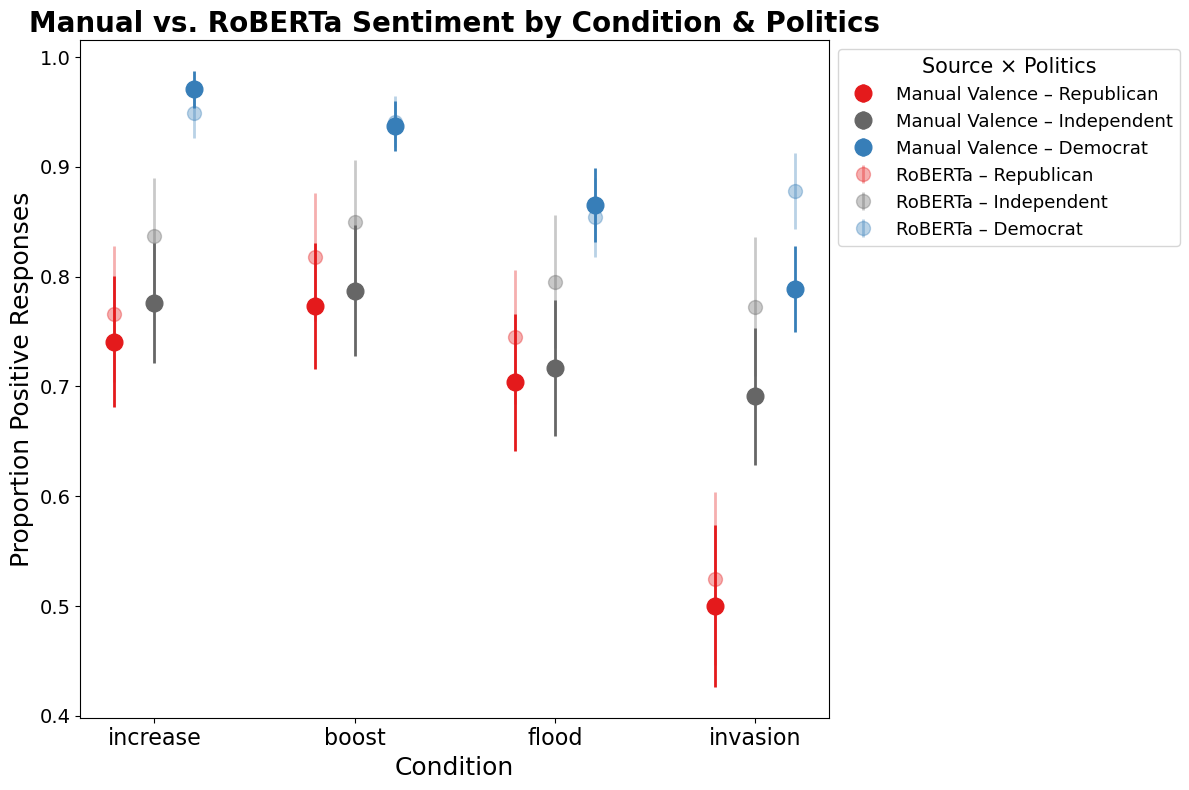

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Order
conditions = ["increase", "boost", "flood", "invasion"]
politicalView = ["Republican", "Independent", "Democrat"]
palette = {
    "Democrat": "#377eb8",
    "Republican": "#e41a1c",
    "Independent": "#666666"
}

x = np.arange(len(conditions))
width = 0.2  # separation between political groups

plt.figure(figsize=(12, 8))
politicalView = valence_summary["politicalView"].unique()

# Plot manually coded valence (primary)
for i, party in enumerate(politicalView):
    group = valence_summary[valence_summary["politicalView"] == party]
    x_pos = x + (i - 1) * width
    plt.errorbar(
        x=x_pos,
        y=group["proportion_positive"],
        yerr=1 * group["se"],
        fmt='o',
        label=f"Manual Valence – {party}",
        color=palette[party],
        capsize=0,
        markersize=12,
        linewidth=2,
        alpha=1.0
    )

# Plot RoBERTa sentiment (transparent overlay)
for i, party in enumerate(politicalView):
    group = roberta_bin_summary[roberta_bin_summary["politicalView"] == party]
    x_pos = x + (i - 1) * width
    plt.errorbar(
        x=x_pos,
        y=group["proportion_positive"],
        yerr=1 * group["se"],
        fmt='o',
        label=f"RoBERTa – {party}",
        color=palette[party],
        capsize=0,
        markersize=10,
        linewidth=2,
        alpha=0.35
    )

plt.xticks(ticks=x, labels=conditions, fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Condition", fontsize=18)
plt.ylabel("Proportion Positive Responses", fontsize=18)
plt.title("Manual vs. RoBERTa Sentiment by Condition & Politics", fontsize=20, weight='bold')
plt.legend(title="Source × Politics", fontsize=13, title_fontsize=15, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(False)
plt.tight_layout()
plt.show()

In [26]:
from scipy.stats import zscore

df["positive_z"] = zscore(df["positive"].dropna(), nan_policy="omit")
df["likert_z"] = zscore(df["likert"].dropna(), nan_policy="omit")

In [27]:
likert_z_summary = (
    df
    .groupby(["condition", "politicalView"], as_index=False)
    .agg(
        n=("likert_z", lambda x: x.notna().sum()),
        mean_z=("likert_z", "mean"),
        sd_z=("likert_z", "std")
    )
)
likert_z_summary["se"] = likert_z_summary["sd_z"] / np.sqrt(likert_z_summary["n"])
likert_z_summary["ci_low"] = likert_z_summary["mean_z"] - 1.96 * likert_z_summary["se"]
likert_z_summary["ci_high"] = likert_z_summary["mean_z"] + 1.96 * likert_z_summary["se"]

positive_z_summary = (
    df
    .groupby(["condition", "politicalView"], as_index=False)
    .agg(
        n=("positive_z", lambda x: x.notna().sum()),
        mean_z=("positive_z", "mean"),
        sd_z=("positive_z", "std")
    )
)
positive_z_summary["se"] = positive_z_summary["sd_z"] / np.sqrt(positive_z_summary["n"])
positive_z_summary["ci_low"] = positive_z_summary["mean_z"] - 1.96 * positive_z_summary["se"]
positive_z_summary["ci_high"] = positive_z_summary["mean_z"] + 1.96 * positive_z_summary["se"]

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_69548/3948427037.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["condition", "politicalView"], as_index=False)
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_69548/3948427037.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["condition", "politicalView"], as_index=False)


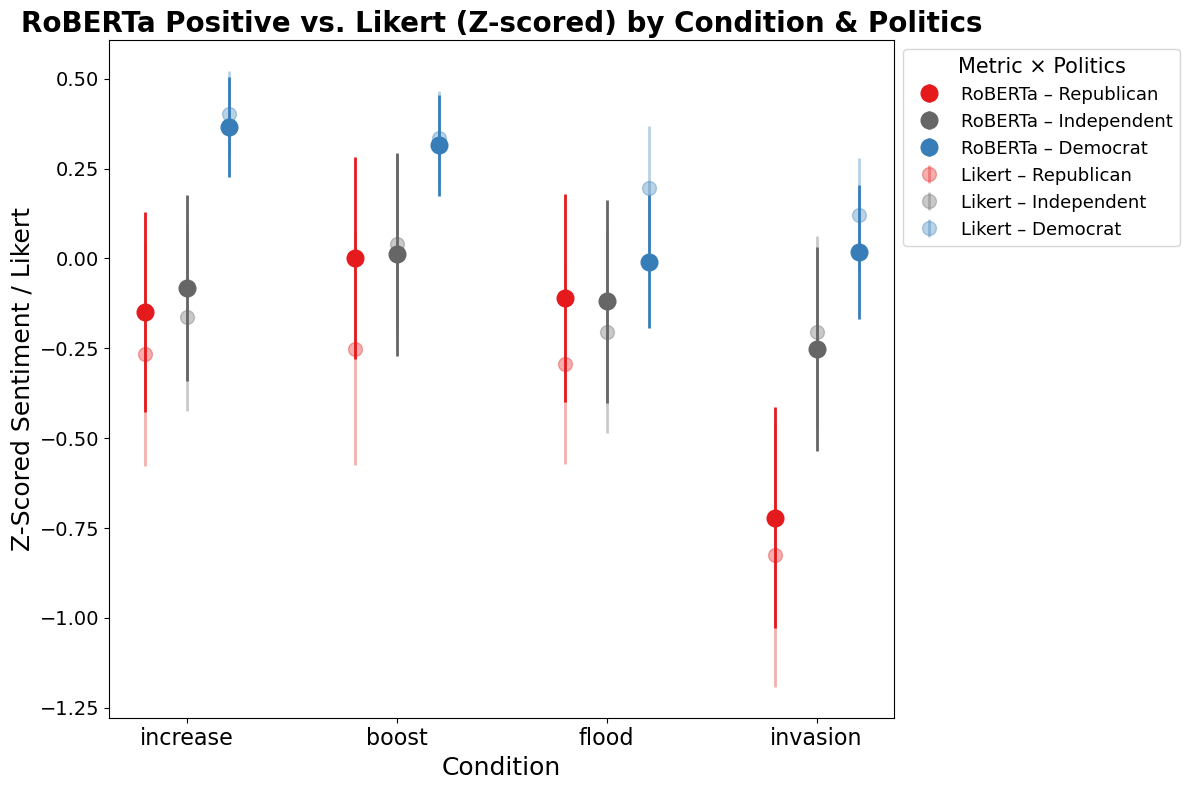

In [28]:
plt.figure(figsize=(12, 8))

# Plot RoBERTa (main line)
for i, party in enumerate(politicalView):
    group = positive_z_summary[positive_z_summary["politicalView"] == party]
    x_pos = x + (i - 1) * width
    plt.errorbar(
        x=x_pos,
        y=group["mean_z"],
        yerr=1.96 * group["se"],
        fmt='o',
        label=f"RoBERTa – {party}",
        color=palette[party],
        capsize=0,
        markersize=12,
        linewidth=2,
        alpha=1.0
    )

# Plot Likert (transparent overlay)
for i, party in enumerate(politicalView):
    group = likert_z_summary[likert_z_summary["politicalView"] == party]
    x_pos = x + (i - 1) * width
    plt.errorbar(
        x=x_pos,
        y=group["mean_z"],
        yerr=1.96 * group["se"],
        fmt='o',
        label=f"Likert – {party}",
        color=palette[party],
        capsize=0,
        markersize=10,
        linewidth=2,
        alpha=0.35
    )

# Labels & formatting
plt.xticks(ticks=x, labels=conditions, fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Condition", fontsize=18)
plt.ylabel("Z-Scored Sentiment / Likert", fontsize=18)
plt.title("RoBERTa Positive vs. Likert (Z-scored) by Condition & Politics", fontsize=20, weight='bold')
plt.legend(title="Metric × Politics", fontsize=13, title_fontsize=15, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(False)
plt.tight_layout()
plt.show()


In [29]:
valid_paraphrase = df["paraphrase"].notna() & df["paraphrase"].str.strip().astype(bool)
paraphrase_scores = df.loc[valid_paraphrase, "paraphrase"].apply(roberta_sentiment)
paraphrase_df = pd.DataFrame(list(paraphrase_scores), index=df.loc[valid_paraphrase].index)
df[["paraphrase_negative", "paraphrase_neutral", "paraphrase_positive"]] = paraphrase_df
df["paraphrase_sentiment"] = df[
    ["paraphrase_negative", "paraphrase_neutral", "paraphrase_positive"]
].idxmax(axis=1).str.replace("paraphrase_", "")

In [30]:
model = smf.ols("paraphrase_positive ~ C(condition) * C(politicalView)", data=df).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     paraphrase_positive   R-squared:                       0.043
Model:                             OLS   Adj. R-squared:                  0.031
Method:                  Least Squares   F-statistic:                     3.533
Date:                 Wed, 09 Apr 2025   Prob (F-statistic):           7.20e-05
Time:                         21:13:40   Log-Likelihood:                 241.28
No. Observations:                  875   AIC:                            -458.6
Df Residuals:                      863   BIC:                            -401.3
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [31]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [32]:
model = SentenceTransformer('all-MiniLM-L6-v2')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [33]:
original_passage = "In the last three years, there has been a(n) [METAPHOR] of immigrant labor in the town of Addison. This change has affected the local economy in several ways..."

# Replace with neutral version
neutral_passage = original_passage.replace("[METAPHOR]", "increase")

# Embed original passage
original_embedding = model.encode(neutral_passage)


In [34]:
passage_templates = {
    "increase": """In the last three years, there has been an increase of immigrant labor in the town of Addison. Most of the immigrants do farm work in the surrounding agricultural communities. Some have expanded into construction, cleaning, food service, or other manual labor professions. Some immigrants have also started businesses, opening restaurants, or small shops. In 2016, there were 12,000 immigrants working in Addison, but that number has rapidly grown. In 2020, there were 40,000 immigrant workers.""",
    
    "boost": """In the last three years, there has been a boost of immigrant labor in the town of Addison. Most of the immigrants do farm work in the surrounding agricultural communities. Some have expanded into construction, cleaning, food service, or other manual labor professions. Some immigrants have also started businesses, opening restaurants, or small shops. In 2016, there were 12,000 immigrants working in Addison, but that number has rapidly grown. In 2020, there were 40,000 immigrant workers.""",
    
    "flood": """In the last three years, there has been a flood of immigrant labor in the town of Addison. Most of the immigrants do farm work in the surrounding agricultural communities. Some have expanded into construction, cleaning, food service, or other manual labor professions. Some immigrants have also started businesses, opening restaurants, or small shops. In 2016, there were 12,000 immigrants working in Addison, but that number has rapidly grown. In 2020, there were 40,000 immigrant workers.""",
    
    "invasion": """In the last three years, there has been an invasion of immigrant labor in the town of Addison. Most of the immigrants do farm work in the surrounding agricultural communities. Some have expanded into construction, cleaning, food service, or other manual labor professions. Some immigrants have also started businesses, opening restaurants, or small shops. In 2016, there were 12,000 immigrants working in Addison, but that number has rapidly grown. In 2020, there were 40,000 immigrant workers."""
}

In [35]:
# Prepare similarity scores
similarities = []

# Iterate through rows
for idx, row in df.iterrows():
    cond = row["condition"]
    paraphrase = row.get("paraphrase", "")
    
    if isinstance(paraphrase, str) and paraphrase.strip() and cond in passage_templates:
        passage_text = passage_templates[cond]
        embedding_passage = model.encode(passage_text)
        embedding_paraphrase = model.encode(paraphrase)
        
        # Compute cosine similarity
        sim = cosine_similarity([embedding_paraphrase], [embedding_passage])[0][0]
    else:
        sim = np.nan
    
    similarities.append(sim)

# Store in new column
df["paraphrase_similarity"] = similarities

In [36]:
import statsmodels.formula.api as smf

# Drop NA similarities
df_sim = df[df["paraphrase_similarity"].notna()].copy()

# Run linear model
similarity_model = smf.ols("paraphrase_similarity ~ C(condition) * C(politicalView)", data=df_sim).fit()

# Summary output
print(similarity_model.summary())

                              OLS Regression Results                             
Dep. Variable:     paraphrase_similarity   R-squared:                       0.028
Model:                               OLS   Adj. R-squared:                  0.015
Method:                    Least Squares   F-statistic:                     2.248
Date:                   Wed, 09 Apr 2025   Prob (F-statistic):             0.0108
Time:                           21:14:03   Log-Likelihood:                 588.01
No. Observations:                    875   AIC:                            -1152.
Df Residuals:                        863   BIC:                            -1095.
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [42]:
# Create the quantile-based group
df_sim['paraphrase_similarity_groups'] = pd.qcut(
    df_sim['paraphrase_similarity'],
    q=3,
    labels=['low', 'medium', 'high']
)

# Save to CSV
df_sim.to_csv('data/metaphorValenceSimilarity.csv', index=False)

print("Saved updated df_sim with 'paraphrase_similarity_groups' to data/metaphorValenceSimilarity.csv")

Saved updated df_sim with 'paraphrase_similarity_groups' to data/metaphorValenceSimilarity.csv


In [37]:
import numpy as np

# Summary dataframe
similarity_summary = (
    df_sim
    .groupby(["condition", "politicalView"], as_index=False)
    .agg(
        n=("paraphrase_similarity", "count"),
        mean_similarity=("paraphrase_similarity", "mean"),
        sd_similarity=("paraphrase_similarity", "std")
    )
)

# Add standard error and 95% CI
similarity_summary["se"] = similarity_summary["sd_similarity"] / np.sqrt(similarity_summary["n"])
similarity_summary["ci_low"] = similarity_summary["mean_similarity"] - 1.96 * similarity_summary["se"]
similarity_summary["ci_high"] = similarity_summary["mean_similarity"] + 1.96 * similarity_summary["se"]


/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_69548/443503102.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["condition", "politicalView"], as_index=False)


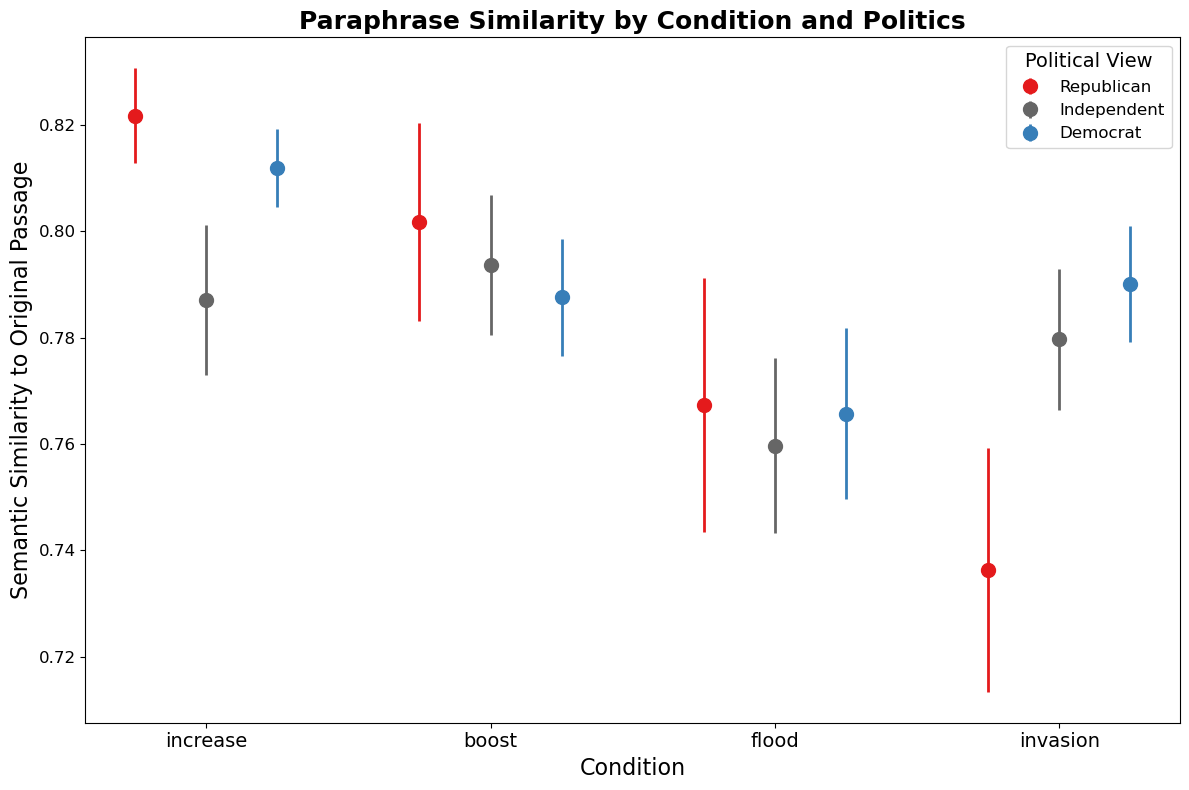

In [38]:
import matplotlib.pyplot as plt

# Plot setup
conditions = ["increase", "boost", "flood", "invasion"]
politics = ["Republican", "Independent", "Democrat"]
palette = {
    "Democrat": "#377eb8",
    "Republican": "#e41a1c",
    "Independent": "#666666"
}
x = np.arange(len(conditions))
width = 0.25

plt.figure(figsize=(12, 8))

# Plot error bars for each political group
for i, party in enumerate(politics):
    group = similarity_summary[similarity_summary["politicalView"] == party]
    x_pos = x + (i - 1) * width
    plt.errorbar(
        x=x_pos,
        y=group["mean_similarity"],
        yerr=1 * group["se"],
        fmt='o',
        label=party,
        color=palette[party],
        capsize=0,
        markersize=10,
        linewidth=2
    )

plt.xticks(ticks=x, labels=conditions, fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel("Condition", fontsize=16)
plt.ylabel("Semantic Similarity to Original Passage", fontsize=16)
plt.title("Paraphrase Similarity by Condition and Politics", fontsize=18, weight='bold')
plt.legend(title="Political View", fontsize=12, title_fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()

**Metaphors like "invasion" not only bias how people evaluate immigration (as we knew) but also alter their memory of the facts.
This distortion is strongest among Republicans — suggesting they may be more susceptible to metaphoric framing, or that it activates ideologically congruent schemas (e.g., war-like threat framing).**

Do some metaphors distort recall more?

Does political alignment lead to closer/further paraphrasing?

An ideologically asymmetric framing effect

Evidence that metaphors don’t just shift sentiment — they shift mental representations and memory reconstruction, selectively by group

Test if semantic similarity predicts sentiment or likert scores — are those with low similarity also more emotionally extreme in response? Are low-similarity Republican paraphrases introducing new threat-related content? Speculation: low similarity, especially among Republicans, might be associated with more negative sentiment or lower Likert scores → possibly reflecting paraphrases that go beyond the original in a threat-oriented way

In [259]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values for relevant variables
df_model = df[
    df["paraphrase_similarity"].notna() &
    df["likert"].notna() &
    df["roberta_sentiment"].isin(["positive", "negative", "neutral"])
].copy()


# === Model 1: Semantic similarity → Likert score ===
model_likert = smf.ols("likert ~ paraphrase_similarity * C(politicalView)", data=df_model).fit()
print("\n=== Likert score model ===")
print(model_likert.summary())



=== Likert score model ===
                            OLS Regression Results                            
Dep. Variable:                 likert   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     23.07
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           8.58e-22
Time:                        21:12:01   Log-Likelihood:                -1950.8
No. Observations:                 875   AIC:                             3914.
Df Residuals:                     869   BIC:                             3942.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

**Lower semantic similarity is associated with more negative interpretations!!**

Participants who produced more semantically similar paraphrases gave more positive Likert ratings about immigration in Addison.

More faithful reproduction of the passage = more favorable attitudes.
Conversely, lower similarity → more negative Likert scores = threat-based reinterpretation?

No significant interaction with political view (all interaction p > 0.5):

The link between similarity and Likert score is consistent across all political groups (Republicans, Independents, Democrats).

**Insight:**

Republicans may diverge more semantically (e.g., under invasion framing), but when they do paraphrase closely, their attitudes are more positive — just like everyone else. So the mechanism of reinterpretation (not just ideology) seems to matter.

Do those paraphrases also yield more negative Likert responses?	✅ Yes

Is this effect stronger in Republicans?	🚫 Not statistically — but Republicans produce more low-similarity paraphrases under the invasion frame, which could explain their more negative responses

Are there different mechanisms across political groups?	🤔 Possibly — Republicans may be amplifying threat language, while others stay more neutral/factual

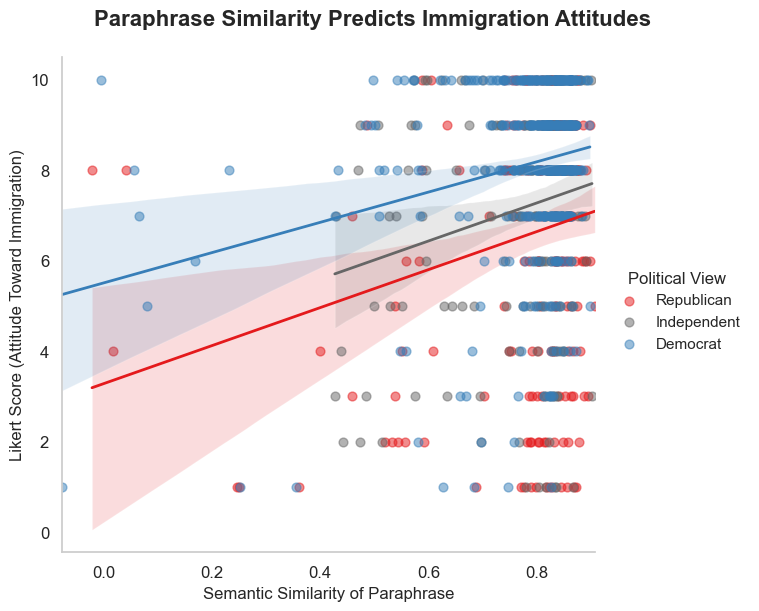

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = {
    "Democrat": "#377eb8",
    "Republican": "#e41a1c",
    "Independent": "#666666"
}

# Cleaned subset for plotting
df_plot = df[df["paraphrase_similarity"].notna() & df["likert"].notna()].copy()

# Create lmplot and assign to variable `g`
g = sns.lmplot(
    data=df_plot,
    x="paraphrase_similarity",
    y="likert",
    hue="politicalView",
    scatter_kws={"alpha": 0.5, "s": 40},
    line_kws={"linewidth": 2},
    palette=palette,
    height=6,
    aspect=1,
    legend=True
)

# Set axis labels and title using lmplot methods
g.set_axis_labels("Semantic Similarity of Paraphrase", "Likert Score (Attitude Toward Immigration)")
g.fig.suptitle("Paraphrase Similarity Predicts Immigration Attitudes", fontsize=16, weight='bold')

# Adjust legend placement (move outside the plot)
# Shrink and style the legend
legend = g._legend
legend.set_bbox_to_anchor((1.02, 0.5))     # move to right center
legend.set_title("Political View", prop={"size": 12})
for text in legend.texts:
    text.set_fontsize(11)

legend.set_frame_on(False)                 # remove box

# Adjust ticks and grid
for ax in g.axes.flat:
    ax.tick_params(labelsize=12)
    ax.grid(False)

# Adjust layout to make space for legend and title
g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()

In [1]:
df_plot["sim_bin"] = pd.qcut(df_plot["paraphrase_similarity"], q=3, labels=["low", "medium", "high"])

summary = (
    df_plot.groupby(["sim_bin", "politicalView"])
    .agg(mean_likert=("likert", "mean"), se=("likert", lambda x: x.std()/len(x)**0.5))
    .reset_index()
)

plt.figure(figsize=(6, 6))
for party in summary["politicalView"].unique():
    group = summary[summary["politicalView"] == party]
    plt.errorbar(
        x=group["sim_bin"],
        y=group["mean_likert"],
        yerr=1 * group["se"],
        label=party,
        marker='o',
        linewidth=2,
        capsize=4,
        color=palette[party]
    )

plt.axhline(5, linestyle="--", color="gray", alpha=0.5)
plt.xlabel("Semantic Similarity (Binned)")
plt.ylabel("Average Likert Score")
plt.title("Semantic similarity increases as a function of attitudes", fontsize=16, weight="bold")
plt.legend(title="Political View")
plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined

In [262]:
# Recreate df_plot_combined
df_plot = df[df["paraphrase_similarity"].notna() & df["likert"].notna()].copy()

# Ensure politicalView is categorical and includes "All"
if not pd.api.types.is_categorical_dtype(df_plot["politicalView"]):
    df_plot["politicalView"] = pd.Categorical(df_plot["politicalView"])

if "All" not in df_plot["politicalView"].cat.categories:
    df_plot["politicalView"] = df_plot["politicalView"].cat.add_categories("All")

df_plot_full = df_plot.copy()
df_plot_full["politicalView"] = "All"

df_plot_combined = pd.concat([df_plot, df_plot_full], ignore_index=True)


/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_18855/2520966409.py:5: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



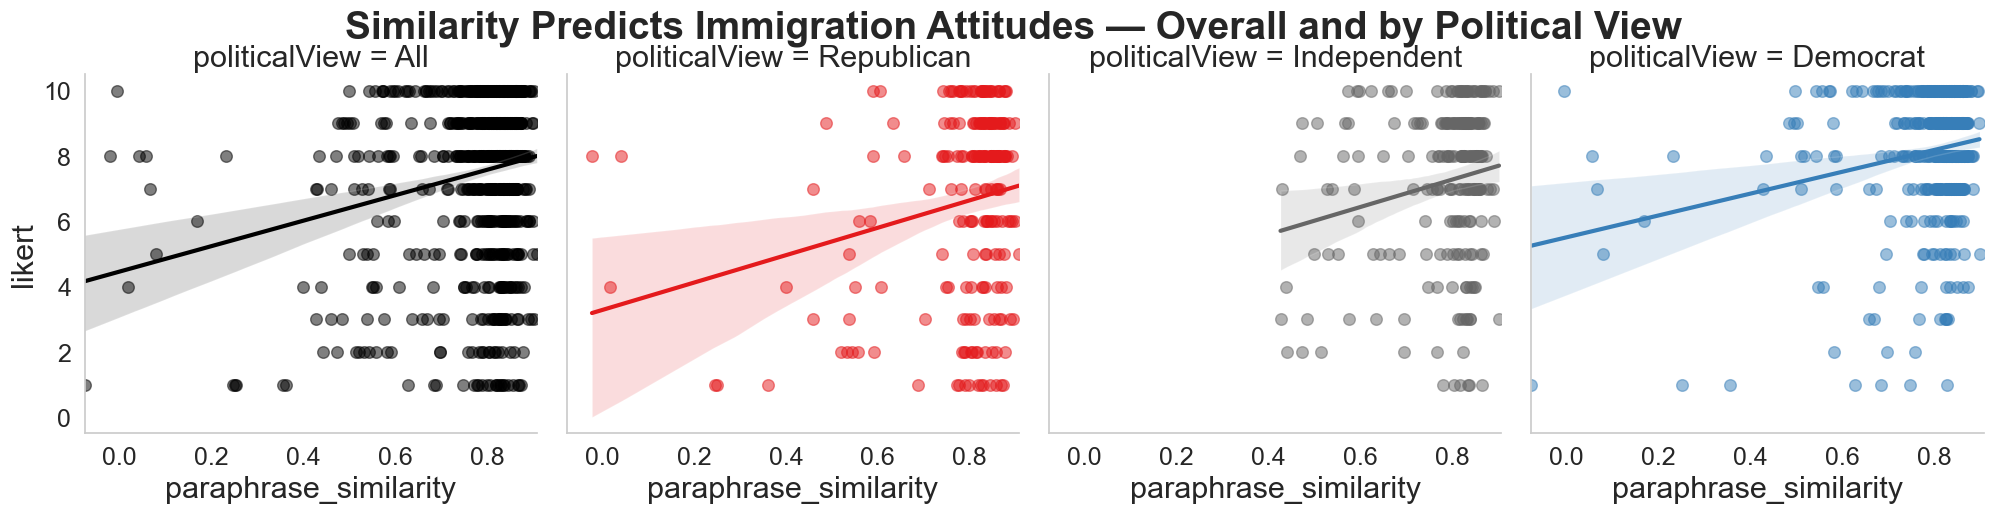

In [263]:
# FORCE fonts to be huge
plt.rcParams.update({
    "font.size": 20,
    "axes.titlesize": 24,
    "axes.labelsize": 22,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "figure.titlesize": 28
})

# Facet size control
height = 5
aspect = 1

palette = {
    "Democrat": "#377eb8",
    "Republican": "#e41a1c",
    "Independent": "#666666",
    "All": "black"
}

g = sns.lmplot(
    data=df_plot_combined,
    x="paraphrase_similarity",
    y="likert",
    col="politicalView",
    hue="politicalView",
    col_order=["All", "Republican", "Independent", "Democrat"],
    palette=palette,
    height=height,
    aspect=aspect,
    scatter_kws={"alpha": 0.5, "s": 70},
    line_kws={"linewidth": 3},
    legend=False
)

# No need to manually set fonts anymore
for ax in g.axes.flat:
    ax.grid(False)
    ax.set_facecolor("white")

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Similarity Predicts Immigration Attitudes — Overall and by Political View",
               weight='bold')

plt.show()

**Participants who more faithfully reproduced the original passage content gave more positive attitudes toward immigration. This effect holds across all political groups, although Republicans are more likely to paraphrase with lower similarity overall.**

In [264]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anachkhaidze/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anachkhaidze/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/anachkhaidze/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anachkhaidze/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anachkhaidze/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [265]:
# === Immigration Frame Lexicon Analysis with Lemmatization (Improved with SpaCy) ===

import pandas as pd
import numpy as np
import re
from scipy.stats import zscore

# === 1. Define lexicons ===
war_lexicon = [
    "attack", "attacked", "aggression", "aggressor", "enemy", "enemies", "threat", "threatening",
    "danger", "force", "control", "violence", "overwhelm", "overwhelming", "takeover", "conquer",
    "defense", "military", "security", "illegal", "border", "combat", "hostile", "conflict", "occupation",
    "breach", "resistance"
]

nature_lexicon = [
    "wave", "waves", "surge", "overflow", "torrent", "swept", "submerge", "submerged", "inundate",
    "inundation", "tsunami", "natural", "waters", "disaster", "rising", "overwhelm", "storm", "deluge",
    "drown", "tide", "current", "crash", "drift", "erupt", "landslide"
]

growth_lexicon = [
    "growth", "opportunity", "development", "expand", "expansion", "contribution", "support",
    "investment", "success", "positive", "benefit", "create", "prosper", "build"
]

# === 2. Tokenize paraphrases ===
def simple_tokenize(text):
    return re.findall(r"\b\w+\b", str(text).lower())

df["paraphrase_tokens"] = df["paraphrase"].apply(simple_tokenize)

# === 3. Count lexicon matches ===
def count_matches(tokens, lexicon):
    return sum(1 for word in tokens if word in lexicon)

df["war_matches"] = df["paraphrase_tokens"].apply(lambda x: count_matches(x, war_lexicon))
df["nature_matches"] = df["paraphrase_tokens"].apply(lambda x: count_matches(x, nature_lexicon))
df["growth_matches"] = df["paraphrase_tokens"].apply(lambda x: count_matches(x, growth_lexicon))

df["n_tokens"] = df["paraphrase_tokens"].apply(len)
df["prop_war"] = df["war_matches"] / df["n_tokens"]
df["prop_nature"] = df["nature_matches"] / df["n_tokens"]
df["prop_growth"] = df["growth_matches"] / df["n_tokens"]

df["z_prop_war"] = zscore(df["prop_war"].fillna(0))
df["z_prop_nature"] = zscore(df["prop_nature"].fillna(0))
df["z_prop_growth"] = zscore(df["prop_growth"].fillna(0))

In [266]:
# === 4. Remove original passage tokens ===
original_passage = """
In the last three years, there has been a(n) {} of immigrant labor in the town of Addison. Most of the immigrants do farm work in the surrounding agricultural communities. Some have expanded into construction, cleaning, food service, or other manual labor professions. Some immigrants have also started businesses, opening restaurants, or small shops. In 2016, there were 12,000 immigrants working in Addison, but that number has rapidly grown. In 2020, there were 40,000 immigrant workers.
"""
passage_tokens = set(simple_tokenize(original_passage))
passage_tokens.add("increase")

def non_passage_tokens(tokens):
    return [word for word in tokens if word not in passage_tokens]

df["non_passage_tokens"] = df["paraphrase_tokens"].apply(non_passage_tokens)
df["n_non_passage"] = df["non_passage_tokens"].apply(len)

def count_matches_filtered(tokens, lexicon):
    return sum(1 for word in tokens if word in lexicon)

df["war_matches_filtered"] = df["non_passage_tokens"].apply(lambda x: count_matches_filtered(x, war_lexicon))
df["nature_matches_filtered"] = df["non_passage_tokens"].apply(lambda x: count_matches_filtered(x, nature_lexicon))
df["growth_matches_filtered"] = df["non_passage_tokens"].apply(lambda x: count_matches_filtered(x, growth_lexicon))

df["prop_war_filtered"] = df["war_matches_filtered"] / df["n_non_passage"]
df["prop_nature_filtered"] = df["nature_matches_filtered"] / df["n_non_passage"]
df["prop_growth_filtered"] = df["growth_matches_filtered"] / df["n_non_passage"]

In [267]:
# === 3. Remove tokens from original passage ===
original_passage = """
In the last three years, there has been a(n) {} of immigrant labor in the town of Addison. Most of the immigrants do farm work in the surrounding agricultural communities. Some have expanded into construction, cleaning, food service, or other manual labor professions. Some immigrants have also started businesses, opening restaurants, or small shops. In 2016, there were 12,000 immigrants working in Addison, but that number has rapidly grown. In 2020, there were 40,000 immigrant workers.
"""

passage_tokens = set([lemmatizer.lemmatize(w) for w in re.findall(r'\b\w+\b', original_passage.lower())])
passage_tokens.add("increase")

def non_passage_tokens(tokens):
    return [word for word in tokens if word not in passage_tokens]

df["non_passage_tokens"] = df["paraphrase_tokens"].apply(non_passage_tokens)
df["n_non_passage"] = df["non_passage_tokens"].apply(len)

def count_matches_filtered(tokens, lexicon):
    return sum(1 for word in tokens if word in lexicon)

df["war_matches_filtered"] = df["non_passage_tokens"].apply(lambda x: count_matches_filtered(x, war_expanded))
df["nature_matches_filtered"] = df["non_passage_tokens"].apply(lambda x: count_matches_filtered(x, nature_expanded))
df["growth_matches_filtered"] = df["non_passage_tokens"].apply(lambda x: count_matches_filtered(x, growth_expanded))

df["prop_war_filtered"] = df["war_matches_filtered"] / df["n_non_passage"]
df["prop_nature_filtered"] = df["nature_matches_filtered"] / df["n_non_passage"]
df["prop_growth_filtered"] = df["growth_matches_filtered"] / df["n_non_passage"]

In [268]:
# === 5. Group summaries ===
summary_filtered = (
    df
    .groupby(["condition", "politicalView"], observed=True)
    .agg(
        n=("paraphrase", "count"),
        mean_war=("prop_war_filtered", "mean"),
        se_war=("prop_war_filtered", lambda x: np.std(x, ddof=1) / np.sqrt(len(x))),
        mean_nature=("prop_nature_filtered", "mean"),
        se_nature=("prop_nature_filtered", lambda x: np.std(x, ddof=1) / np.sqrt(len(x))),
        mean_growth=("prop_growth_filtered", "mean"),
        se_growth=("prop_growth_filtered", lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
    )
    .reset_index()
)

In [269]:
summary_filtered_raw = (
    df
    .groupby(["condition", "politicalView"], observed=True)
    .agg(
        n=("paraphrase", "count"),
        mean_war=("war_matches_filtered", "mean"),
        se_war=("war_matches_filtered", lambda x: np.std(x, ddof=1) / np.sqrt(len(x))),
        mean_nature=("nature_matches_filtered", "mean"),
        se_nature=("nature_matches_filtered", lambda x: np.std(x, ddof=1) / np.sqrt(len(x))),
        mean_growth=("growth_matches_filtered", "mean"),
        se_growth=("growth_matches_filtered", lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
    )
    .reset_index()
)

In [270]:
summary_filtered

,condition,politicalView,n,mean_war,se_war,mean_nature,se_nature,mean_growth,se_growth
0,increase,Republican,55,0.001653,0.001653,0.001653,0.001653,0.016804,0.008778
1,increase,Independent,61,0.002342,0.002342,0.009719,0.005657,0.022678,0.008456
2,increase,Democrat,105,0.008651,0.004057,0.025786,0.006636,0.017898,0.005418
3,boost,Republican,53,0.001887,0.001887,0.017790,0.008358,0.007862,0.005619
4,boost,Independent,50,0.002500,0.002500,0.011500,0.006747,0.003333,0.003333
5,boost,Democrat,113,0.004671,0.002333,0.007719,0.003359,0.007104,0.003462
6,flood,Republican,56,0.003571,0.003571,0.022817,0.009447,0.008503,0.006433
7,flood,Independent,53,0.010063,0.007272,0.028931,0.013410,0.006918,0.004865
8,flood,Democrat,111,0.014290,0.009279,0.042480,0.011498,0.008269,0.003652
9,invasion,Republican,49,0.014480,0.008078,0.027041,0.011248,0.008017,0.005823


In [271]:
summary_filtered_raw

,condition,politicalView,n,mean_war,se_war,mean_nature,se_nature,mean_growth,se_growth
0,increase,Republican,55,0.018182,0.018182,0.018182,0.018182,0.072727,0.035339
1,increase,Independent,61,0.016393,0.016393,0.049180,0.027917,0.114754,0.041147
2,increase,Democrat,105,0.047619,0.020882,0.142857,0.034313,0.114286,0.034007
3,boost,Republican,53,0.018868,0.018868,0.094340,0.040535,0.037736,0.026425
4,boost,Independent,50,0.020000,0.020000,0.060000,0.033927,0.040000,0.040000
5,boost,Democrat,113,0.035398,0.017460,0.061947,0.026017,0.053097,0.024636
6,flood,Republican,56,0.017857,0.017857,0.107143,0.041705,0.035714,0.025023
7,flood,Independent,53,0.037736,0.026425,0.094340,0.040535,0.037736,0.026425
8,flood,Democrat,111,0.054054,0.021560,0.234234,0.061319,0.054054,0.021560
9,invasion,Republican,49,0.081633,0.039520,0.122449,0.047314,0.040816,0.028559


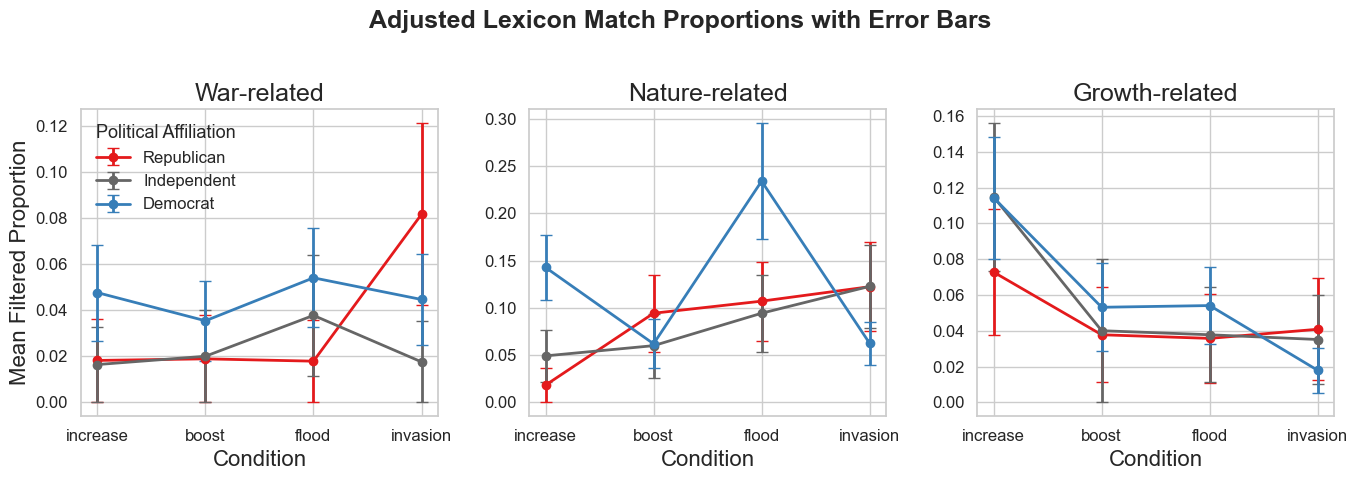

In [272]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=False)

metrics = [
    ("mean_war", "se_war", "War-related"),
    ("mean_nature", "se_nature", "Nature-related"),
    ("mean_growth", "se_growth", "Growth-related")
]

for i, (mean_col, se_col, title) in enumerate(metrics):
    ax = axes[i]
    for party in politics:
        subset = summary_filtered_raw[summary_filtered_raw["politicalView"] == party]
        x = np.arange(len(conditions))
        means = [
            subset[subset["condition"] == cond][mean_col].values[0] if cond in subset["condition"].values else np.nan
            for cond in conditions
        ]
        errors = [
            subset[subset["condition"] == cond][se_col].values[0] if cond in subset["condition"].values else np.nan
            for cond in conditions
        ]

        # Only label once for legend
        ax.errorbar(
            x, means, yerr=[1.00 * e for e in errors],
            label=party if i == 0 else None,
            color=palette[party], marker='o',
            linewidth=2, capsize=4
        )
    ax.set_xticks(x)
    ax.set_xticklabels(conditions, fontsize=16)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel("Condition", fontsize=16)
    if i == 0:
        ax.set_ylabel("Mean Filtered Proportion", fontsize=16)
    ax.tick_params(labelsize=12)

# Add the legend to the first subplot only
axes[0].legend(
    title="Political Affiliation",
    fontsize=12,
    title_fontsize=13,
    loc="upper left",           # you can also try 'lower left' or use bbox_to_anchor
    frameon=False
)

# Title + layout
fig.suptitle("Adjusted Lexicon Match Proportions with Error Bars", fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

In [273]:
from collections import Counter
import itertools

# Flatten lists of matching tokens per lexicon
used_war = list(itertools.chain.from_iterable(
    df["paraphrase_tokens"].apply(lambda tokens: [w for w in tokens if w in war_expanded])
))
used_nature = list(itertools.chain.from_iterable(
    df["paraphrase_tokens"].apply(lambda tokens: [w for w in tokens if w in nature_expanded])
))
used_growth = list(itertools.chain.from_iterable(
    df["paraphrase_tokens"].apply(lambda tokens: [w for w in tokens if w in growth_expanded])
))

# Count them
war_counts = Counter(used_war)
nature_counts = Counter(used_nature)
growth_counts = Counter(used_growth)

In [274]:
import pandas as pd

def prepare_count_df(counter, label):
    return pd.DataFrame(counter.items(), columns=["word", "count"]).assign(category=label)

war_df = prepare_count_df(war_counts, "war")
nature_df = prepare_count_df(nature_counts, "nature")
growth_df = prepare_count_df(growth_counts, "growth")

lexicon_words_df = pd.concat([war_df, nature_df, growth_df]).sort_values("count", ascending=False)


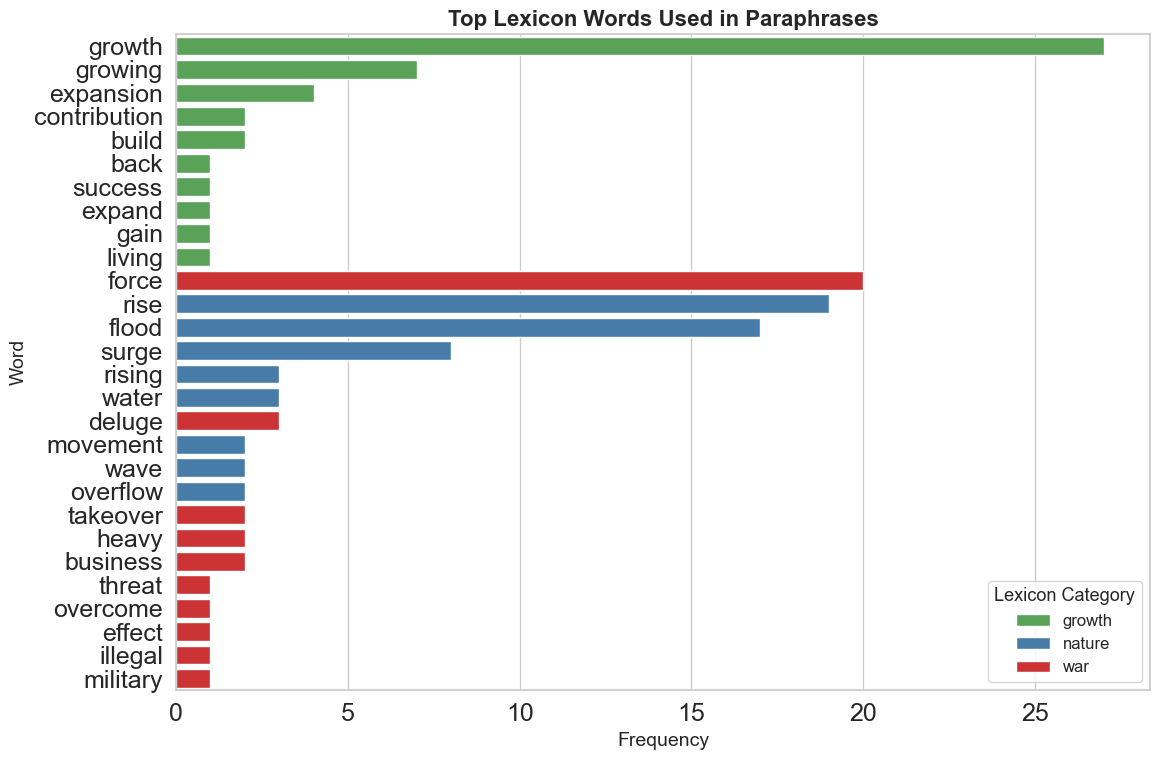

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 10 from each category
top_words_df = (
    lexicon_words_df
    .groupby("category")
    .apply(lambda g: g.nlargest(10, "count"))
    .reset_index(drop=True)
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_words_df,
    x="count", y="word", hue="category",
    dodge=False, palette={"war": "#e41a1c", "nature": "#377eb8", "growth": "#4daf4a"}
)
plt.title("Top Lexicon Words Used in Paraphrases", fontsize=16, weight='bold')
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Word", fontsize=14)
plt.legend(title="Lexicon Category", fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

In [276]:
import statsmodels.formula.api as smf

# WAR-themed language
model_war = smf.ols("prop_war_filtered ~ C(condition) * C(politicalView)", data=df).fit()
print("\n=== WAR FRAME MODEL ===")
print(model_war.summary())

# NATURE-themed language
model_nature = smf.ols("prop_nature_filtered ~ C(condition) * C(politicalView)", data=df).fit()
print("\n=== NATURE FRAME MODEL ===")
print(model_nature.summary())

# GROWTH-themed language
model_growth = smf.ols("prop_growth_filtered ~ C(condition) * C(politicalView)", data=df).fit()
print("\n=== GROWTH FRAME MODEL ===")
print(model_growth.summary())


=== WAR FRAME MODEL ===
                            OLS Regression Results                            
Dep. Variable:      prop_war_filtered   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6629
Date:                Sun, 06 Apr 2025   Prob (F-statistic):              0.774
Time:                        21:12:02   Log-Likelihood:                 1439.2
No. Observations:                 875   AIC:                            -2854.
Df Residuals:                     863   BIC:                            -2797.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [277]:
from collections import Counter

# Flatten and count all words across paraphrases
all_words = [word for tokens in df["paraphrase_tokens"] for word in tokens]
word_counts = Counter(all_words)

# Select only words from our lexicons
combined_lexicon = set(war_lexicon + nature_lexicon + growth_lexicon)
lexicon_word_counts = {word: count for word, count in word_counts.items() if word in combined_lexicon}

# Convert to DataFrame and sort
lexicon_word_df = pd.DataFrame.from_dict(lexicon_word_counts, orient='index', columns=['count'])
lexicon_word_df = lexicon_word_df.sort_values(by='count', ascending=False).reset_index()
lexicon_word_df.columns = ['word', 'count']

In [278]:
import re

# STEP 1: Tokenize openQ
# STEP 2: Remove original passage words
# === 6. openQ tokenization and filtering ===
df["openQ_tokens"] = df["openQ"].apply(simple_tokenize)
df["openQ_non_passage_tokens"] = df["openQ_tokens"].apply(non_passage_tokens)
df["n_openQ_non_passage"] = df["openQ_non_passage_tokens"].apply(len)

df["openQ_war_matches_filtered"] = df["openQ_non_passage_tokens"].apply(lambda x: count_matches_filtered(x, war_lexicon))
df["openQ_nature_matches_filtered"] = df["openQ_non_passage_tokens"].apply(lambda x: count_matches_filtered(x, nature_lexicon))
df["openQ_growth_matches_filtered"] = df["openQ_non_passage_tokens"].apply(lambda x: count_matches_filtered(x, growth_lexicon))

df["openQ_prop_war"] = df["openQ_war_matches_filtered"] / df["n_openQ_non_passage"]
df["openQ_prop_nature"] = df["openQ_nature_matches_filtered"] / df["n_openQ_non_passage"]
df["openQ_prop_growth"] = df["openQ_growth_matches_filtered"] / df["n_openQ_non_passage"]

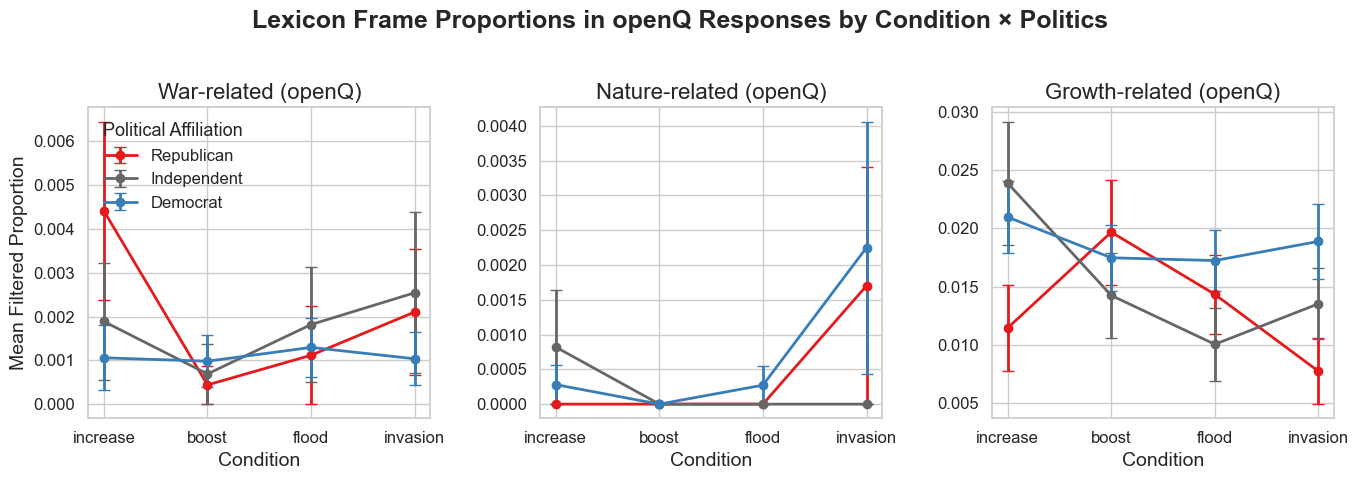

In [279]:
import numpy as np
import matplotlib.pyplot as plt

# Group and summarize openQ match data
summary_openq = (
    df
    .groupby(["condition", "politicalView"], observed=True)
    .agg(
        n=("openQ", "count"),
        mean_war=("openQ_prop_war", "mean"),
        se_war=("openQ_prop_war", lambda x: np.std(x, ddof=1) / np.sqrt(len(x))),
        mean_nature=("openQ_prop_nature", "mean"),
        se_nature=("openQ_prop_nature", lambda x: np.std(x, ddof=1) / np.sqrt(len(x))),
        mean_growth=("openQ_prop_growth", "mean"),
        se_growth=("openQ_prop_growth", lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
    )
    .reset_index()
)

# Plotting setup
fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=False)

metrics = [
    ("mean_war", "se_war", "War-related (openQ)"),
    ("mean_nature", "se_nature", "Nature-related (openQ)"),
    ("mean_growth", "se_growth", "Growth-related (openQ)")
]

for i, (mean_col, se_col, title) in enumerate(metrics):
    ax = axes[i]
    for party in politics:
        subset = summary_openq[summary_openq["politicalView"] == party]
        x = np.arange(len(conditions))
        means = [
            subset[subset["condition"] == cond][mean_col].values[0] if cond in subset["condition"].values else np.nan
            for cond in conditions
        ]
        errors = [
            subset[subset["condition"] == cond][se_col].values[0] if cond in subset["condition"].values else np.nan
            for cond in conditions
        ]

        ax.errorbar(
            x, means, yerr=[1.00 * e for e in errors],
            label=party if i == 0 else None,
            color=palette[party], marker='o',
            linewidth=2, capsize=4
        )
    ax.set_xticks(x)
    ax.set_xticklabels(conditions, fontsize=12)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Condition", fontsize=14)
    if i == 0:
        ax.set_ylabel("Mean Filtered Proportion", fontsize=14)
    ax.tick_params(labelsize=12)

# Add legend inside first subplot
axes[0].legend(
    title="Political Affiliation",
    fontsize=12,
    title_fontsize=13,
    loc="upper left",
    frameon=False
)

fig.suptitle("Lexicon Frame Proportions in openQ Responses by Condition × Politics", fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

In [280]:
from collections import Counter
import itertools

# Flatten lists of matching tokens per lexicon
used_war_openQ = list(itertools.chain.from_iterable(
    df["openQ_tokens"].apply(lambda tokens: [w for w in tokens if w in war_expanded])
))
used_nature_openQ = list(itertools.chain.from_iterable(
    df["openQ_tokens"].apply(lambda tokens: [w for w in tokens if w in nature_expanded])
))
used_growth_openQ = list(itertools.chain.from_iterable(
    df["openQ_tokens"].apply(lambda tokens: [w for w in tokens if w in growth_expanded])
))

# Count them
war_counts_openQ = Counter(used_war_openQ)
nature_counts_openQ = Counter(used_nature_openQ)
growth_counts_openQ = Counter(used_growth_openQ)

import pandas as pd

def prepare_count_df(counter, label):
    return pd.DataFrame(counter.items(), columns=["word", "count"]).assign(category=label)

war_df_openQ = prepare_count_df(war_counts_openQ, "war")
nature_df_openQ = prepare_count_df(nature_counts_openQ, "nature")
growth_df_openQ = prepare_count_df(growth_counts_openQ, "growth")

lexicon_words_df_openQ = pd.concat([war_df_openQ, nature_df_openQ, growth_df_openQ]).sort_values("count", ascending=False)


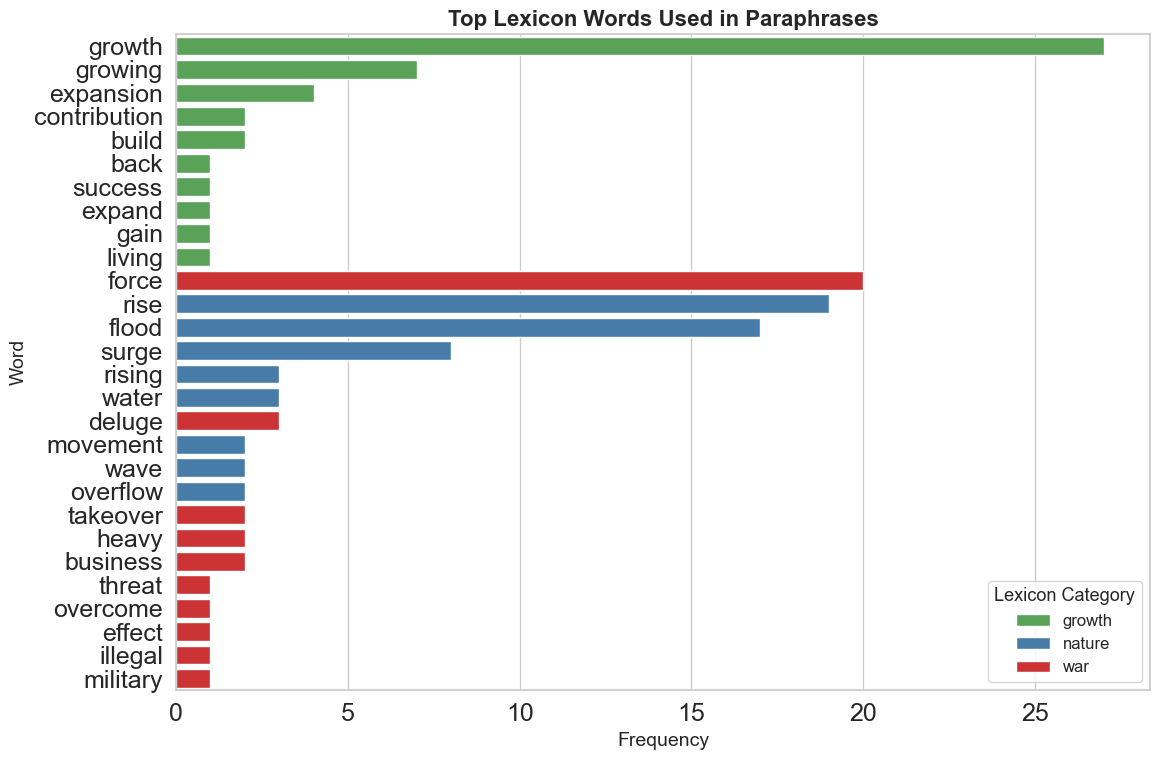

In [281]:
# Get top 10 from each category
top_words_df = (
    lexicon_words_df
    .groupby("category")
    .apply(lambda g: g.nlargest(10, "count"))
    .reset_index(drop=True)
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_words_df,
    x="count", y="word", hue="category",
    dodge=False, palette={"war": "#e41a1c", "nature": "#377eb8", "growth": "#4daf4a"}
)
plt.title("Top Lexicon Words Used in Paraphrases", fontsize=16, weight='bold')
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Word", fontsize=14)
plt.legend(title="Lexicon Category", fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

In [282]:
import statsmodels.formula.api as smf

model_war = smf.ols("openQ_prop_war ~ C(condition) * C(politicalView)", data=df).fit()
model_nature = smf.ols("openQ_prop_nature ~ C(condition) * C(politicalView)", data=df).fit()
model_growth = smf.ols("openQ_prop_growth ~ C(condition) * C(politicalView)", data=df).fit()

print(model_war.summary())
print(model_nature.summary())
print(model_growth.summary())

                            OLS Regression Results                            
Dep. Variable:         openQ_prop_war   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8872
Date:                Sun, 06 Apr 2025   Prob (F-statistic):              0.553
Time:                        21:12:03   Log-Likelihood:                 2914.4
No. Observations:                 875   AIC:                            -5805.
Df Residuals:                     863   BIC:                            -5747.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

**Does metaphorical framing (e.g., invasion, flood, boost) in the original passage shape how participants later describe immigration — in either their recall (paraphrases) or opinion-based responses (openQ)?**

**Paraphrases Show Strong Framing Effects**
Participants’ paraphrases — where they recalled or rephrased the original passage — were strongly shaped by the metaphor they were exposed to.

Invasion Frame ➤ More War Language

Participants in the invasion condition used significantly more war-related words (e.g., "attack", "enemy", "threat").

p = .010, effect retained even when controlling for political view.

Flood Frame ➤ More Nature/Disaster Language

Participants in the flood condition also used more nature-based words (e.g., "wave", "surge"), but this was only marginally significant.

Stronger increases were seen among Democrats.

Boost Frame ➤ More Growth/Positive Language

The boost condition led to more usage of growth-related terms (e.g., "opportunity", "business"), particularly among Republicans and Independents.

Statistically significant: p = .034

🔍 Interpretation:
When people retell what they read, they appear to mirror the metaphor they were given — reinforcing its frame in their language.

**openQ Responses: Framing Influence Weaker **
When asked to express their own opinions about the effects of immigration (openQ), participants' language was less sensitive to the metaphor.**

War-related language was not significantly higher in the invasion condition (p = .38).

Nature/disaster language did not increase in the flood condition.

Growth-related language was somewhat higher among Democrats (p = .058), but framing itself had no consistent effect.

Interpretation:
While people mimic metaphors when recalling the stimulus, they do not consistently carry those metaphors into their open-ended policy opinions — possibly due to:

More deliberative reasoning in opinion responses

Use of personal beliefs overriding the frame

Lexicon mismatch (e.g., people may agree with a frame without using its language)

**Conclusion**
🧠 Memory-based retellings (paraphrases) are highly frame-sensitive: people unconsciously echo the metaphor.

💬 Open-ended evaluations (openQ) show weaker effects, suggesting framing has more impact on memory than belief — or that people resist metaphor adoption in their own voice.

In [283]:
df_neutral = df[df["condition"] == "increase"]

summary_neutral = (
    df_neutral
    .groupby("politicalView", observed=True)
    .agg(
        n=("openQ", "count"),
        war_paraphrase_mean=("prop_war_filtered", "mean"),
        war_openQ_mean=("openQ_prop_war", "mean"),
        nature_paraphrase_mean=("prop_nature_filtered", "mean"),
        nature_openQ_mean=("openQ_prop_nature", "mean")
    )
    .reset_index()
)
print(summary_neutral)

  politicalView    n  war_paraphrase_mean  war_openQ_mean  \
0    Republican   55             0.001653        0.004412   
1   Independent   61             0.002342        0.001887   
2      Democrat  105             0.008651        0.001058   

   nature_paraphrase_mean  nature_openQ_mean  
0                0.001653            0.00000  
1                0.009719            0.00082  
2                0.025786            0.00028  


In [284]:
import statsmodels.formula.api as smf

# OpenQ war frame usage
model_war = smf.ols("openQ_prop_war ~ C(politicalView)", data=df_neutral).fit()
model_flood = smf.ols("openQ_prop_nature ~ C(politicalView)", data=df_neutral).fit()
print(model_war.summary())
print(model_flood.summary())

                            OLS Regression Results                            
Dep. Variable:         openQ_prop_war   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.797
Date:                Sun, 06 Apr 2025   Prob (F-statistic):              0.168
Time:                        21:12:03   Log-Likelihood:                 690.94
No. Observations:                 221   AIC:                            -1376.
Df Residuals:                     218   BIC:                            -1366.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Test whether Republicans (vs. Democrats) exposed to neutral framing (e.g., increase) are more likely to use invasion/flood-related language (above). Doesn't seem like it.

In [340]:
from sentence_transformers import SentenceTransformer, util
import torch
import pandas as pd

# # Define improved frame prompts with clearer semantic and emotional context
# frame_prompts = {
#     "Economic Impact": "Immigrants positively contribute to the economy by supporting businesses, creating new companies, driving innovation, and generating overall economic growth.",
#     "Cultural Enrichment": "Immigrants positively enrich communities by bringing diverse perspectives, traditions, cuisines, and artistic contributions that enhance the cultural fabric of society.",
#     "Demographic Support": "Immigrants beneficially maintain population levels, support aging communities, and help sustain essential services and infrastructure that might otherwise decline.",
#     "Resource Strain": "Immigrants negatively strain public services, housing availability, healthcare systems, and government resources, creating challenges for communities to meet growing demands.",
#     "Labor Market Competition": "Immigrants negatively impact job availability and wage levels for existing residents by taking jobs, replacing workers, and increasing competition, particularly affecting certain sectors or skill levels.",
#     "Crime and Security Concerns": "Immigrants negatively affect public safety by increasing crime rates, creating security risks, and challenging law enforcement systems.",
#     "Cultural Displacement": "Immigrants negatively affect social cohesion by diluting national identity, creating cultural clashes, and challenging existing community values and norms.",
#     "Legal Violations": "Immigrants negatively impact society by circumventing legal immigration channels, undermining sovereignty, and challenging the rule of law."
# }

frame_prompts = {
    "Economic Impact": "Immigrants positively contribute to the economy by supporting businesses, creating new companies, driving innovation, and generating overall economic growth.",
    "Demographic Support": "Immigrants beneficially maintain population levels, support aging communities, and help sustain essential services and infrastructure that might otherwise decline.",
    "Resource Strain": "Immigrants negatively strain public services, housing availability, healthcare systems, and government resources, creating challenges for communities to meet growing demands.",
    "Labor Market Competition": "Immigrants negatively impact job availability and wage levels for existing residents by taking jobs, replacing workers, and increasing competition, particularly affecting certain sectors or skill levels.",
    "Crime and Security Concerns": "Immigrants negatively affect public safety by increasing crime rates, creating security risks, and challenging law enforcement systems.",
}

# Load sentiment-aware embedding model (same one used before for consistency)
model = SentenceTransformer("all-MiniLM-L6-v2")

# Embed frame prompts with richer context
frame_labels = list(frame_prompts.keys())
frame_texts = list(frame_prompts.values())
frame_embeddings = model.encode(frame_texts, convert_to_tensor=True)

# Store for later reuse in ensemble/similarity checking
frame_embeddings, frame_labels


(tensor([[ 0.0634, -0.0338, -0.0177,  ...,  0.0916,  0.1504, -0.0076],
         [ 0.0436,  0.0261,  0.0233,  ...,  0.0904,  0.1092, -0.0608],
         [ 0.0646, -0.0320,  0.0146,  ...,  0.0520,  0.0618, -0.0026],
         [ 0.0414, -0.0123,  0.0496,  ...,  0.0325,  0.0638,  0.0060],
         [ 0.1306,  0.0421, -0.0227,  ...,  0.0696,  0.0823, -0.0151]],
        device='mps:0'),
 ['Economic Impact',
  'Demographic Support',
  'Resource Strain',
  'Labor Market Competition',
  'Crime and Security Concerns'])

In [342]:
import pickle
from tqdm import tqdm
import numpy as np
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util
import torch
import pandas as pd

def classify_immigration_frames(df, frame_prompts, text_column="openQ", sentiment_column="roberta_sentiment", 
                               cache_file="zero_shot_results.pkl", force_recompute=False):
    """
    Comprehensive immigration frame classification using an ensemble of zero-shot classification
    and sentiment-aware semantic similarity.
    
    Args:
        df: DataFrame containing text responses
        frame_prompts: Dictionary of frame names and their descriptions
        text_column: Column containing the text to classify
        sentiment_column: Column containing sentiment labels
        cache_file: File to store/load zero-shot results
        force_recompute: Whether to force recomputation of zero-shot results
    
    Returns:
        DataFrame with binary indicators for each frame and confidence scores
    """
    # Extract frame information
    frame_labels = list(frame_prompts.keys())
    frame_texts = list(frame_prompts.values())
    openq_texts = df[text_column].astype(str).fillna("").str.strip().tolist()
    
    # Create enhanced frame descriptions for semantic similarity
    # This helps distinguish frames with overlapping terminology
    enhanced_frame_texts = []
    for frame, text in zip(frame_labels, frame_texts):
        if frame == "Economic Impact":
            # Reduce job-related terminology to avoid confusion with Labor Market Competition
            enhanced_text = text + " They boost the economy through entrepreneurship, business ownership, innovation, and expanding consumer markets, increasing overall prosperity."
            enhanced_frame_texts.append(enhanced_text)
        elif frame == "Labor Market Competition":
            # Add more explicit job displacement terminology
            enhanced_text = text + " They take jobs away from locals, cause unemployment for native workers, replace existing employees, and reduce available positions for citizens."
            enhanced_frame_texts.append(enhanced_text)
        else:
            enhanced_frame_texts.append(text)
    
    # Load or run zero-shot classifier
    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
    
    # Handle zero-shot results (load cache or compute)
    if force_recompute:
        print("Forcing recomputation of zero-shot classification...")
        zero_shot_results = []
        for text in tqdm(openq_texts, desc="Running zero-shot classification"):
            try:
                result = classifier(text, frame_labels)
                zero_shot_results.append(result)
            except Exception as e:
                print(f"Error processing text: {text[:50]}... - {str(e)}")
                # Create a placeholder result
                zero_shot_results.append({
                    "labels": frame_labels,
                    "scores": [0.0] * len(frame_labels)
                })
        
        # Save cache
        with open(cache_file, 'wb') as f:
            pickle.dump(zero_shot_results, f)
        print("✅ Saved zero-shot results to cache.")
    else:
        try:
            with open(cache_file, 'rb') as f:
                zero_shot_results = pickle.load(f)
            print("✅ Loaded cached zero-shot results.")
        except FileNotFoundError:
            print("No cache found. Computing zero-shot classification...")
            zero_shot_results = []
            for text in tqdm(openq_texts, desc="Running zero-shot classification"):
                try:
                    result = classifier(text, frame_labels)
                    zero_shot_results.append(result)
                except Exception as e:
                    print(f"Error processing text: {text[:50]}... - {str(e)}")
                    # Create a placeholder result
                    zero_shot_results.append({
                        "labels": frame_labels,
                        "scores": [0.0] * len(frame_labels)
                    })
            
            # Save cache
            with open(cache_file, 'wb') as f:
                pickle.dump(zero_shot_results, f)
            print("✅ Saved zero-shot results to cache.")
    
    # Load better embedding model for semantic similarity
    print("Loading sentence embedding model...")
    model = SentenceTransformer("all-mpnet-base-v2")  # Upgrade from MiniLM for better performance
    
    # Create embeddings - use enhanced descriptions for better differentiation
    print("Encoding enhanced frame descriptions...")
    frame_embeddings = model.encode(enhanced_frame_texts, convert_to_tensor=True)
    
    print("Encoding text responses...")
    openq_embeddings = model.encode(openq_texts, convert_to_tensor=True, show_progress_bar=True)
    
    # Calculate semantic similarity
    cos_sim = util.cos_sim(openq_embeddings, frame_embeddings)
    
    # Get device for consistency
    device = openq_embeddings.device
    frame_embeddings = frame_embeddings.to(device)
    cos_sim = cos_sim.to(device)
    
    # Define frame polarities (matches sentiment orientation)
    frame_polarity = torch.tensor([
        1,  # Economic Impact (positive)
        1,  # Demographic Support (positive)
        -1, # Resource Strain (negative)
        -1, # Labor Market Competition (negative)
        -1, # Crime and Security Concerns (negative)
    ], dtype=torch.float).to(device)
    
    # Convert sentiment labels to tensor scores
    sentiment_tensor = torch.tensor([
        1 if s == "positive" else -1 if s == "negative" else 0 
        for s in df[sentiment_column].values
    ], dtype=torch.float32).to(device)
    
    # Expand dimensions for broadcasting
    sentiment_tensor = sentiment_tensor.unsqueeze(1)  # [num_texts, 1]
    frame_polarity = frame_polarity.unsqueeze(0)      # [1, num_frames]
    
    # Calculate sentiment alignment bonus
    # Higher when sentiment matches frame polarity (positive*positive or negative*negative)
    sentiment_alignment = sentiment_tensor * frame_polarity  # [num_texts, num_frames]
    
    # Apply sentiment adjustment to similarity scores (multiplicative approach)
    # Increased sentiment factor for stronger influence on job-related frames
    sentiment_factor = 0.4  # Increased from 0.3 for more sentiment influence
    ensemble_sim = cos_sim * (1 + sentiment_factor * sentiment_alignment)
    
    # Convert zero-shot results to tensor
    zero_shot_tensor = torch.zeros((len(openq_texts), len(frame_labels))).to(device)
    for i, result in enumerate(zero_shot_results):
        for j, (label, score) in enumerate(zip(result["labels"], result["scores"])):
            idx = frame_labels.index(label) if label in frame_labels else j
            zero_shot_tensor[i, idx] = score
    
    # Combine zero-shot results with similarity scores
    # More balanced weighting between zero-shot and similarity
    zs_weight = 0.5  # Increased from 0.4 for more zero-shot influence
    sim_weight = 0.5  # Decreased from 0.6 to balance
    final_ensemble = (sim_weight * ensemble_sim + zs_weight * zero_shot_tensor)
    
    # Apply job-related keyword boost for Labor Market Competition
    # This helps catch examples that explicitly mention job displacement
    job_displacement_boost = torch.zeros_like(final_ensemble)
    
    # Keywords associated with job displacement/competition
    job_keywords = ['job', 'work', 'employ', 'labor', 'wage', 'salary', 'hire']
    displacement_keywords = ['take', 'took', 'steal', 'stole', 'lose', 'lost', 'replace', 
                            'displace', 'compete', 'competition', 'unemployment']
    
    # Apply boost if text contains job AND displacement keywords
    labor_market_idx = frame_labels.index("Labor Market Competition")
    for i, text in enumerate(openq_texts):
        text_lower = text.lower()
        
        # Check for job keywords
        has_job_term = any(keyword in text_lower for keyword in job_keywords)
        # Check for displacement keywords
        has_displacement_term = any(keyword in text_lower for keyword in displacement_keywords)
        
        # Boost Labor Market Competition score if both present
        if has_job_term and has_displacement_term:
            job_displacement_boost[i, labor_market_idx] = 0.2  # Boost amount
    
    # Apply boost to final ensemble
    final_ensemble = final_ensemble + job_displacement_boost
    
    # Use adaptive thresholding
    frame_presence = torch.zeros_like(final_ensemble)
    frame_confidence = torch.zeros_like(final_ensemble)
    
    for i in range(final_ensemble.shape[0]):
        row = final_ensemble[i]
        
        # Store raw confidence scores
        frame_confidence[i] = row
        
        # Always include top frame
        top_score, top_idx = torch.max(row, dim=0)
        frame_presence[i, top_idx] = 1
        
        # Calculate adaptive threshold
        mean_score = row.mean()
        std_score = row.std()
        adaptive_threshold = mean_score + 0.7 * std_score  # Tunable parameter
        
        # Include additional frames above threshold
        for j, score in enumerate(row):
            if j != top_idx and score > adaptive_threshold:
                frame_presence[i, j] = 1
    
    # Convert to pandas DataFrames
    df_frames = pd.DataFrame(frame_presence.cpu().numpy(), columns=frame_labels)
    df_confidence = pd.DataFrame(frame_confidence.cpu().numpy(), 
                                columns=[f"{frame}_confidence" for frame in frame_labels])
    
    # Combine results
    results_df = pd.concat([df_frames, df_confidence], axis=1)
    results_df.index = df.index  # align index
    
    return results_df

# Example usage:
# Enhanced frame prompts with clearer distinctions
enhanced_frame_prompts = {
    "Economic Impact": "Immigrants positively contribute to the economy by supporting businesses, creating new companies, driving innovation, and generating overall economic growth.",
    "Demographic Support": "Immigrants beneficially maintain population levels, support aging communities, and help sustain essential services and infrastructure that might otherwise decline.",
    "Resource Strain": "Immigrants negatively strain public services, housing availability, healthcare systems, and government resources, creating challenges for communities to meet growing demands.",
    "Labor Market Competition": "Immigrants negatively impact job availability and wage levels for existing residents by taking jobs, replacing workers, and increasing competition, particularly affecting certain sectors or skill levels.",
    "Crime and Security Concerns": "Immigrants negatively affect public safety by increasing crime rates, creating security risks, and challenging law enforcement systems.",
}

# results_df = classify_immigration_frames(df, enhanced_frame_prompts)
# df_with_frames = pd.concat([df, results_df], axis=1)

In [ ]:
def detect_job_displacement(text):
    """
    Specialized detector for job displacement narratives related to immigration.
    """
    if not isinstance(text, str) or not text.strip():
        return {
            "isJobDisplacement": False,
            "confidence": 0.0,
            "matches": []
        }
    
    text = text.lower()
    matches = []
    
    # Direct phrases that strongly indicate job displacement
    direct_phrases = [
        "put locals out of work",
        "natives out of work",
        "put people out of work",
        "out of work",
        "taking jobs",
        "take jobs",
        "took jobs",
        "stealing jobs",
        "stole jobs",
        "replacing workers",
        "replaced workers",
        "lost jobs",
        "jobs lost",
        "job loss",
        "unemployment",
        "lost work"
    ]
    
    # Check for direct phrases
    for phrase in direct_phrases:
        if phrase in text:
            matches.append(f"Direct phrase match: '{phrase}'")
    
    # Job-related terms
    job_terms = ['job', 'jobs', 'work', 'employment', 'labor', 'wage', 'wages', 'salary', 'hire', 'hiring']
    
    # Actions that suggest displacement
    displacement_actions = [
        'take', 'took', 'taken', 'taking',
        'steal', 'stole', 'stolen', 'stealing',
        'lose', 'lost', 'losing',
        'replace', 'replaced', 'replacing',
        'displace', 'displaced', 'displacing',
        'compete', 'competed', 'competing',
        'impact', 'impacted', 'impacting',
        'affect', 'affected', 'affecting',
        'fill', 'filled', 'filling',
        'put out', 'putting out'
    ]
    
    # Negatively affected groups
    affected_groups = [
        'local', 'locals', 'native', 'natives', 'citizen', 'citizens',
        'american', 'americans', 'resident', 'residents', 'worker', 'workers'
    ]
    
    # Check for job terms
    has_job_term = any(term in text for term in job_terms)
    
    if has_job_term:
        matches.append('Contains job-related term')
        
        # Check for displacement actions
        for action in displacement_actions:
            if action in text:
                matches.append(f"Contains displacement action: '{action}'")
                
        # Check for affected groups
        for group in affected_groups:
            if group in text:
                matches.append(f"Contains affected group: '{group}'")
    
    # Special case for "out of work" pattern
    if "out of work" in text:
        matches.append('Contains "out of work" phrase')
    
    # Determine if this is a job displacement narrative
    return {
        "isJobDisplacement": len(matches) >= 2,
        "confidence": min(1.0, len(matches) / 3),
        "matches": matches
    }

In [355]:
def apply_job_displacement_rule(df_results, df_original, text_column="openQ"):
    """
    Apply job displacement detection as a post-processing step to
    immigration frame classification.
    
    Args:
        df_results: DataFrame with frame classification results
        df_original: DataFrame containing the original text data
        text_column: Column in df_original containing the text to analyze
        
    Returns:
        DataFrame with corrected frame classifications
    """
    # Make a copy to avoid modifying the original
    df_corrected = df_results.copy()
    
    # Check if the Labor Market Competition column exists
    if "Labor Market Competition" not in df_corrected.columns:
        print("Warning: 'Labor Market Competition' column not found. No corrections applied.")
        return df_corrected
    
    # Count how many corrections we make
    corrections = 0
    
    # Process each row
    for idx in df_corrected.index:
        # Skip if this index doesn't exist in the original dataframe
        if idx not in df_original.index:
            continue
            
        # Get the text from the original dataframe
        text = df_original.loc[idx, text_column]
        
        if pd.isna(text) or not text:
            continue
            
        # Apply job displacement detector
        result = detect_job_displacement(text)
        
        # If high confidence job displacement detected but Labor Market Competition not marked
        if result["isJobDisplacement"] and result["confidence"] >= 0.5 and df_corrected.loc[idx, "Labor Market Competition"] == 0:
            # Correct the classification
            df_corrected.loc[idx, "Labor Market Competition"] = 1
            
            # Update confidence if that column exists
            conf_col = "Labor Market Competition_confidence"
            if conf_col in df_corrected.columns:
                # Set to at least 0.7 confidence, or higher if already higher
                current_conf = df_corrected.loc[idx, conf_col]
                df_corrected.loc[idx, conf_col] = max(0.7, current_conf)
            
            corrections += 1
    
    print(f"Applied job displacement corrections to {corrections} rows")
    return df_corrected

In [357]:
# To use cached results (default behavior):
results_df = classify_immigration_frames(df, enhanced_frame_prompts)

## To force recomputation of zero-shot results:
#results_df = classify_immigration_frames(df, enhanced_frame_prompts, force_recompute=True)

corrected_results = apply_job_displacement_rule(results_df, df)

# Combine with your original dataframe
df_with_frames = pd.concat([df, corrected_results], axis=1)

Device set to use mps:0


✅ Loaded cached zero-shot results.
Loading sentence embedding model...
Encoding enhanced frame descriptions...
Encoding text responses...


Batches:   0%|          | 0/28 [00:00<?, ?it/s]

Applied job displacement corrections to 376 rows


In [365]:
# This is the important bit that removes duplicated column names
df_clean = df_with_frames.loc[:, ~df_with_frames.columns.duplicated()].copy()

frame_labels = [
    "Economic Impact",
    "Demographic Support",
    "Resource Strain",
    "Labor Market Competition",
    "Crime and Security Concerns",
    "Cultural Displacement",
    "Legal Violations",
]

# Compute mean and standard error per condition × frame (only for detected frames)
summary_rows = []
for frame in frame_labels:
    for condition, group in df_clean.groupby("condition"):
        # Check if the frame column exists
        if frame in df_clean.columns and group[frame].sum() > 0:
            frame_values = group[frame].dropna()
            
            # Only compute statistics if there are values
            if not frame_values.empty:
                # Basic statistics
                mean = frame_values.mean()
                se = frame_values.std(ddof=1) / np.sqrt(len(frame_values)) if len(frame_values) > 1 else np.nan
                count = len(frame_values)
                
                # Get the confidence score if available
                conf_col = f"{frame}_confidence"
                mean_confidence = group[conf_col].mean() if conf_col in group.columns else None
                
                summary_rows.append({
                    "condition": condition,
                    "frame": frame,
                    "mean": mean,
                    "se": se,
                    "count": count,
                    "mean_confidence": mean_confidence
                })

# Convert the summary into a DataFrame
summary_pivot = pd.DataFrame(summary_rows)

In [366]:
# Compute mean and standard error per politicalView × frame (only for detected frames)
summary_rows_politics = []
for frame in frame_labels:
    for politicalView, group in df_clean.groupby("politicalView"):
        # Only consider frames that were detected for the current politicalView group
        if frame in df_clean.columns and group[frame].sum() > 0:  # If the frame was detected
            frame_values = group[frame].dropna()
            # Only compute statistics for the frame if there are values to compute
            if not frame_values.empty:
                mean = frame_values.mean()
                se = frame_values.std(ddof=1) / np.sqrt(len(frame_values)) if len(frame_values) > 1 else np.nan
                count = len(frame_values)
                
                # Get the confidence score if available
                conf_col = f"{frame}_confidence"
                mean_confidence = group[conf_col].mean() if conf_col in group.columns else None
                
                summary_rows_politics.append({
                    "politicalView": politicalView,
                    "frame": frame,
                    "mean": mean,
                    "se": se,
                    "count": count,
                    "mean_confidence": mean_confidence
                })

# Convert the summary into a DataFrame
summary_pivot_politics = pd.DataFrame(summary_rows_politics)

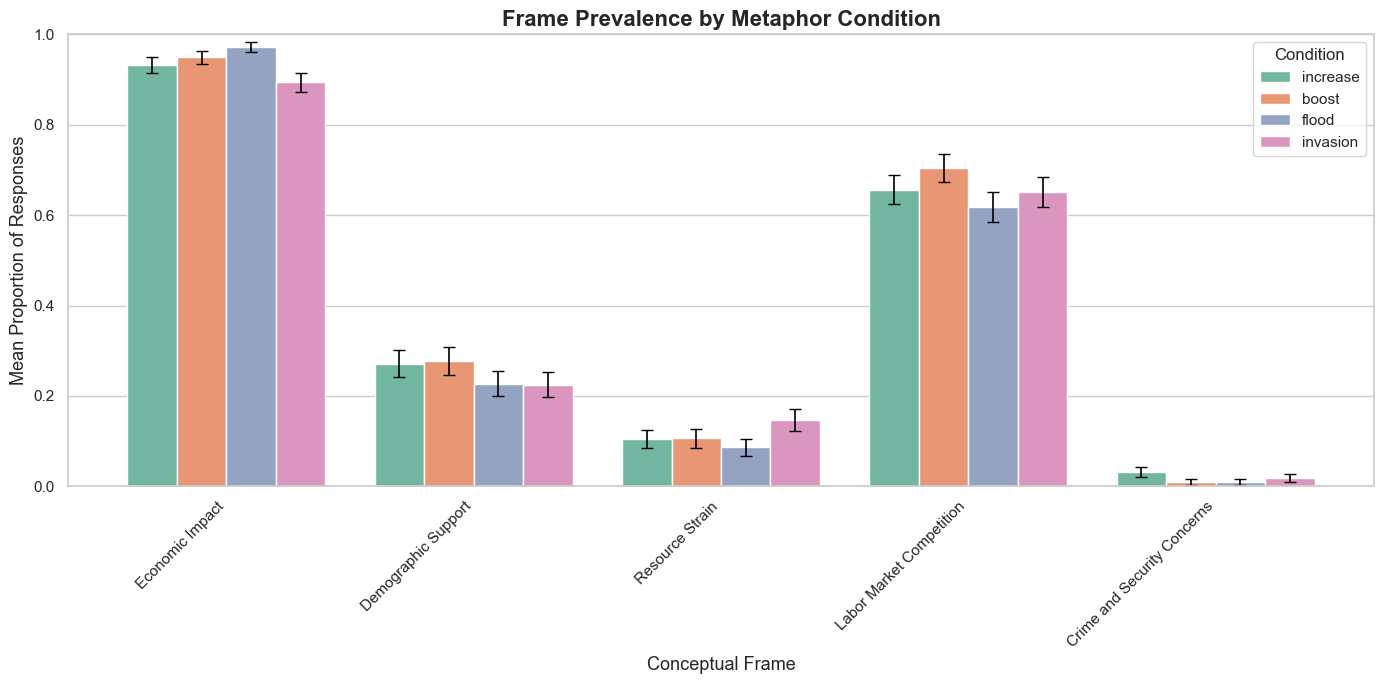

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Barplot: frame × mean, grouped by condition
ax = sns.barplot(
    data=summary_pivot,  # Assuming summary_pivot contains the necessary data
    x="frame",
    y="mean",
    hue="condition",  # Grouping by 'condition' as you originally wanted
    palette="Set2",
    dodge=True
)

# Add error bars manually
# Get the unique orderings used in barplot
frame_order = summary_pivot["frame"].unique().tolist()
condition_order = summary_pivot["condition"].unique().tolist()

# Determine bar width & offsets
bar_width = 0.8 / len(condition_order)  # divide total width among hue groups

for i, row in summary_pivot.iterrows():
    frame_index = frame_order.index(row["frame"])
    hue_index = condition_order.index(row["condition"])

    # Centered x offset for each hue
    x = frame_index - 0.4 + bar_width / 2 + hue_index * bar_width

    ax.errorbar(
        x, row["mean"], yerr=row["se"],
        fmt='none', c='black', capsize=4, linewidth=1.2
    )

# Final touches
plt.ylim(0, 1)
plt.xticks(ticks=range(len(frame_order)), labels=frame_order, rotation=45, ha="right")
plt.title("Frame Prevalence by Metaphor Condition", fontsize=16, weight="bold")
plt.xlabel("Conceptual Frame", fontsize=13)
plt.ylabel("Mean Proportion of Responses", fontsize=13)
plt.legend(title="Condition", title_fontsize=12, fontsize=11)
plt.tight_layout()
plt.show()

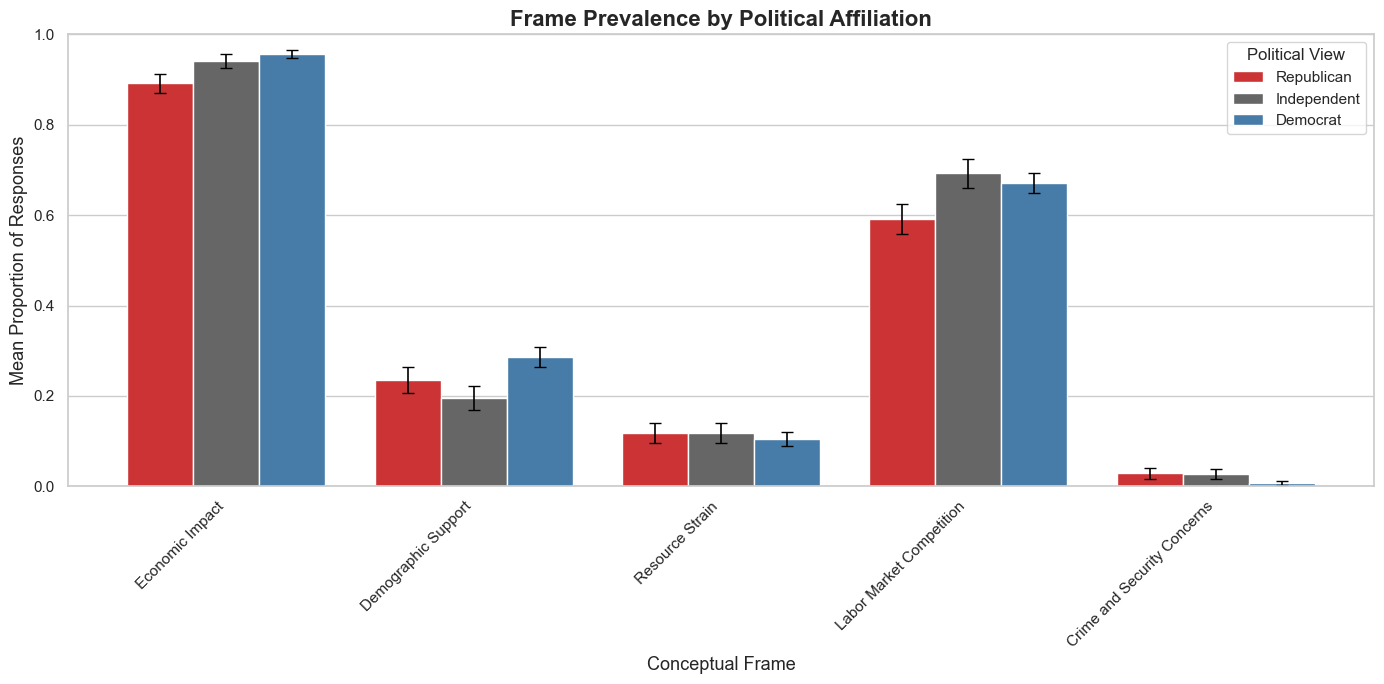

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors
palette = {
    "Democrat": "#377eb8",
    "Republican": "#e41a1c",
    "Independent": "#666666"
}

# Prepare plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Barplot: frame × mean, grouped by politicalView
ax = sns.barplot(
    data=summary_pivot_politics,
    x="frame",
    y="mean",
    hue="politicalView",
    palette=palette,  # 👈 Use your custom palette here
    dodge=True
)

# Get the unique orderings used in barplot
frame_order = summary_pivot_politics["frame"].unique().tolist()
politics_order = summary_pivot_politics["politicalView"].unique().tolist()

# Determine bar width & offsets
bar_width = 0.8 / len(politics_order)

for i, row in summary_pivot_politics.iterrows():
    frame_index = frame_order.index(row["frame"])
    hue_index = politics_order.index(row["politicalView"])
    x = frame_index - 0.4 + bar_width / 2 + hue_index * bar_width

    ax.errorbar(
        x, row["mean"], yerr=row["se"],
        fmt='none', c='black', capsize=4, linewidth=1.2
    )

# Final touches
plt.ylim(0, 1)
plt.xticks(ticks=range(len(frame_order)), labels=frame_order, rotation=45, ha="right")
plt.title("Frame Prevalence by Political Affiliation", fontsize=16, weight="bold")
plt.xlabel("Conceptual Frame", fontsize=13)
plt.ylabel("Mean Proportion of Responses", fontsize=13)
plt.legend(title="Political View", title_fontsize=12, fontsize=11)
plt.tight_layout()
plt.show()

In [377]:
import re
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

# === Step 1: Define frame columns ===
frame_labels = [
    "Economic Impact", "Demographic Support",
    "Resource Strain", "Labor Market Competition", "Crime and Security Concerns"
]

# === Step 2: Clean frame column names for modeling ===
def clean_formula_name(name):
    return "frame_" + re.sub(r"\W+", "", name)

# === Step 3: First ensure we don't have duplicate columns ===
# Create a clean DataFrame without duplicate columns
df_clean = df_with_frames.loc[:, ~df_with_frames.columns.duplicated()].copy()

# Create renaming dictionary
rename_dict = {label: clean_formula_name(label) for label in frame_labels}

# Only include columns that exist
rename_dict_filtered = {k: v for k, v in rename_dict.items() if k in df_clean.columns}
print("Columns being renamed:", rename_dict_filtered)

# Create a DataFrame for modeling
df_for_models = df_clean.rename(columns=rename_dict_filtered)

# === Step 4: Ensure columns are numeric ===
frame_columns = list(rename_dict_filtered.values())
for col in frame_columns:
    if col in df_for_models.columns:
        # Check if already numeric
        if not pd.api.types.is_numeric_dtype(df_for_models[col]):
            df_for_models[col] = df_for_models[col].astype(float)

# === Step 5: Run regression for each frame ===
frame_models = {}
for frame in frame_columns:
    if frame in df_for_models.columns:
        try:
            # Check variation by explicitly calling std() method with numeric output
            std_value = df_for_models[frame].std(numeric_only=True)
            if std_value > 0:
                formula = f"{frame} ~ C(condition) * C(politicalView)"
                model = smf.ols(formula=formula, data=df_for_models).fit()
                frame_models[frame] = model
                print(f"\n📊 Frame: {frame}")
                print(model.summary())
            else:
                print(f"\n⚠️ Not enough variation in {frame} for regression")
        except Exception as e:
            print(f"\n⚠️ Error running regression for {frame}: {str(e)}")
    else:
        print(f"\n⚠️ Frame column {frame} not found in dataset")

Columns being renamed: {'Economic Impact': 'frame_EconomicImpact', 'Demographic Support': 'frame_DemographicSupport', 'Resource Strain': 'frame_ResourceStrain', 'Labor Market Competition': 'frame_LaborMarketCompetition', 'Crime and Security Concerns': 'frame_CrimeandSecurityConcerns'}

📊 Frame: frame_EconomicImpact
                             OLS Regression Results                             
Dep. Variable:     frame_EconomicImpact   R-squared:                       0.035
Model:                              OLS   Adj. R-squared:                  0.022
Method:                   Least Squares   F-statistic:                     2.819
Date:                  Sun, 06 Apr 2025   Prob (F-statistic):            0.00127
Time:                          22:25:00   Log-Likelihood:                 12.789
No. Observations:                   875   AIC:                            -1.578
Df Residuals:                       863   BIC:                             55.71
Df Model:                          

In [363]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def create_frame_facet_plot(df, frame_labels, condition_column="condition", political_view_column="politicalView"):
    """
    Create a faceted plot showing frame proportions by condition and political view.
    Based on your successful plot approach but extended for political views.
    
    Args:
        df: DataFrame containing the data
        frame_labels: List of frame column names
        condition_column: Column name for conditions
        political_view_column: Column name for political views
    """
    # Get unique political views
    political_views = sorted(df[political_view_column].unique())
    
    # Create a figure with subplots - one per political view
    fig, axes = plt.subplots(
        len(political_views), 1,
        figsize=(14, 5 * len(political_views)),
        sharex=True
    )
    
    # If only one political view, make axes iterable
    if len(political_views) == 1:
        axes = [axes]
    
    # For each political view, create a plot similar to your original
    for i, pol_view in enumerate(political_views):
        # Filter data for this political view
        pol_data = df[df[political_view_column] == pol_view]
        
        # Calculate frame statistics
        summary_rows = []
        for frame in frame_labels:
            for condition, group in pol_data.groupby(condition_column):
                if frame in pol_data.columns and group[frame].sum() > 0:
                    frame_values = group[frame].dropna()
                    if not frame_values.empty:
                        mean = frame_values.mean()
                        se = frame_values.std(ddof=1) / np.sqrt(len(frame_values)) if len(frame_values) > 1 else np.nan
                        summary_rows.append({
                            condition_column: condition,
                            "frame": frame,
                            "mean": mean,
                            "se": se
                        })
        
        # Convert to DataFrame
        summary_pivot = pd.DataFrame(summary_rows)
        
        # Skip this political view if no data
        if summary_pivot.empty:
            axes[i].text(0.5, 0.5, f"No data for {pol_view}", 
                         ha='center', va='center', fontsize=14)
            continue
        
        # Create barplot
        ax = axes[i]
        sns.barplot(
            data=summary_pivot,
            x="frame",
            y="mean",
            hue=condition_column,
            palette="Set2",
            dodge=True,
            ax=ax
        )
        
        # Add error bars manually (using your proven approach)
        frame_order = summary_pivot["frame"].unique().tolist()
        condition_order = summary_pivot[condition_column].unique().tolist()
        bar_width = 0.8 / len(condition_order)
        
        for j, row in summary_pivot.iterrows():
            if row["frame"] in frame_order and row[condition_column] in condition_order:
                frame_index = frame_order.index(row["frame"])
                hue_index = condition_order.index(row[condition_column])
                x = frame_index - 0.4 + bar_width / 2 + hue_index * bar_width
                ax.errorbar(
                    x, row["mean"], yerr=row["se"],
                    fmt='none', c='black', capsize=4, linewidth=1.2
                )
        
        # Customize subplot
        ax.set_ylim(0, 1)
        ax.set_title(f"Political View: {pol_view}", fontsize=16, weight="bold")
        
        # Only add x-axis label to bottom plot
        if i == len(political_views) - 1:
            ax.set_xlabel("Conceptual Frame", fontsize=13)
        else:
            ax.set_xlabel("")
        
        ax.set_ylabel("Mean Proportion of Responses", fontsize=13)
        
        # Only show legend on top plot
        if i == 0:
            ax.legend(title=condition_column, title_fontsize=12, fontsize=11)
        else:
            ax.legend().set_visible(False)
        
        ax.set_xticklabels(frame_order, rotation=45, ha="right")
    
    plt.tight_layout()
    return fig

# For comparing conditions across political views (alternative view)
def create_frame_condition_grid(df, frame_labels, condition_column="condition", political_view_column="politicalView"):
    """
    Create a grid of plots showing each frame separately,
    with conditions on x-axis and lines for political views.
    
    This provides an alternative view that highlights political differences 
    within each condition for each frame.
    """
    # Determine grid dimensions
    n_frames = len(frame_labels)
    n_cols = min(3, n_frames)
    n_rows = (n_frames + n_cols - 1) // n_cols
    
    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows), sharex=True)
    if n_rows * n_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    # For each frame, create a plot
    for i, frame in enumerate(frame_labels):
        if i < len(axes):
            ax = axes[i]
            
            # Calculate statistics
            summary_rows = []
            for pol_view in df[political_view_column].unique():
                for condition, group in df[df[political_view_column] == pol_view].groupby(condition_column):
                    if frame in df.columns and group[frame].sum() > 0:
                        frame_values = group[frame].dropna()
                        if not frame_values.empty:
                            mean = frame_values.mean()
                            se = frame_values.std(ddof=1) / np.sqrt(len(frame_values)) if len(frame_values) > 1 else np.nan
                            summary_rows.append({
                                condition_column: condition,
                                political_view_column: pol_view,
                                "mean": mean,
                                "se": se
                            })
            
            # Convert to DataFrame
            summary_df = pd.DataFrame(summary_rows)
            
            if not summary_df.empty:
                # Create plot
                sns.lineplot(
                    data=summary_df,
                    x=condition_column,
                    y="mean",
                    hue=political_view_column,
                    marker='o',
                    ax=ax
                )
                
                # Add error bars
                for pol_view in summary_df[political_view_column].unique():
                    pol_data = summary_df[summary_df[political_view_column] == pol_view]
                    for j, row in pol_data.iterrows():
                        ax.errorbar(
                            row[condition_column], row["mean"], yerr=row["se"],
                            fmt='none', capsize=4, linewidth=1
                        )
            
            # Customize subplot
            ax.set_ylim(0, 1)
            ax.set_title(f"Frame: {frame}", fontsize=14)
            ax.set_ylabel("Mean Proportion")
            
            # Only show legend on first plot
            if i == 0:
                ax.legend(title=political_view_column)
            else:
                ax.legend().set_visible(False)
    
    # Hide empty subplots
    for i in range(len(frame_labels), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    return fig

# Example usage:
# fig1 = create_frame_facet_plot(df, frame_labels)
# plt.figure()
# fig2 = create_frame_condition_grid(df, frame_labels)
# plt.show()

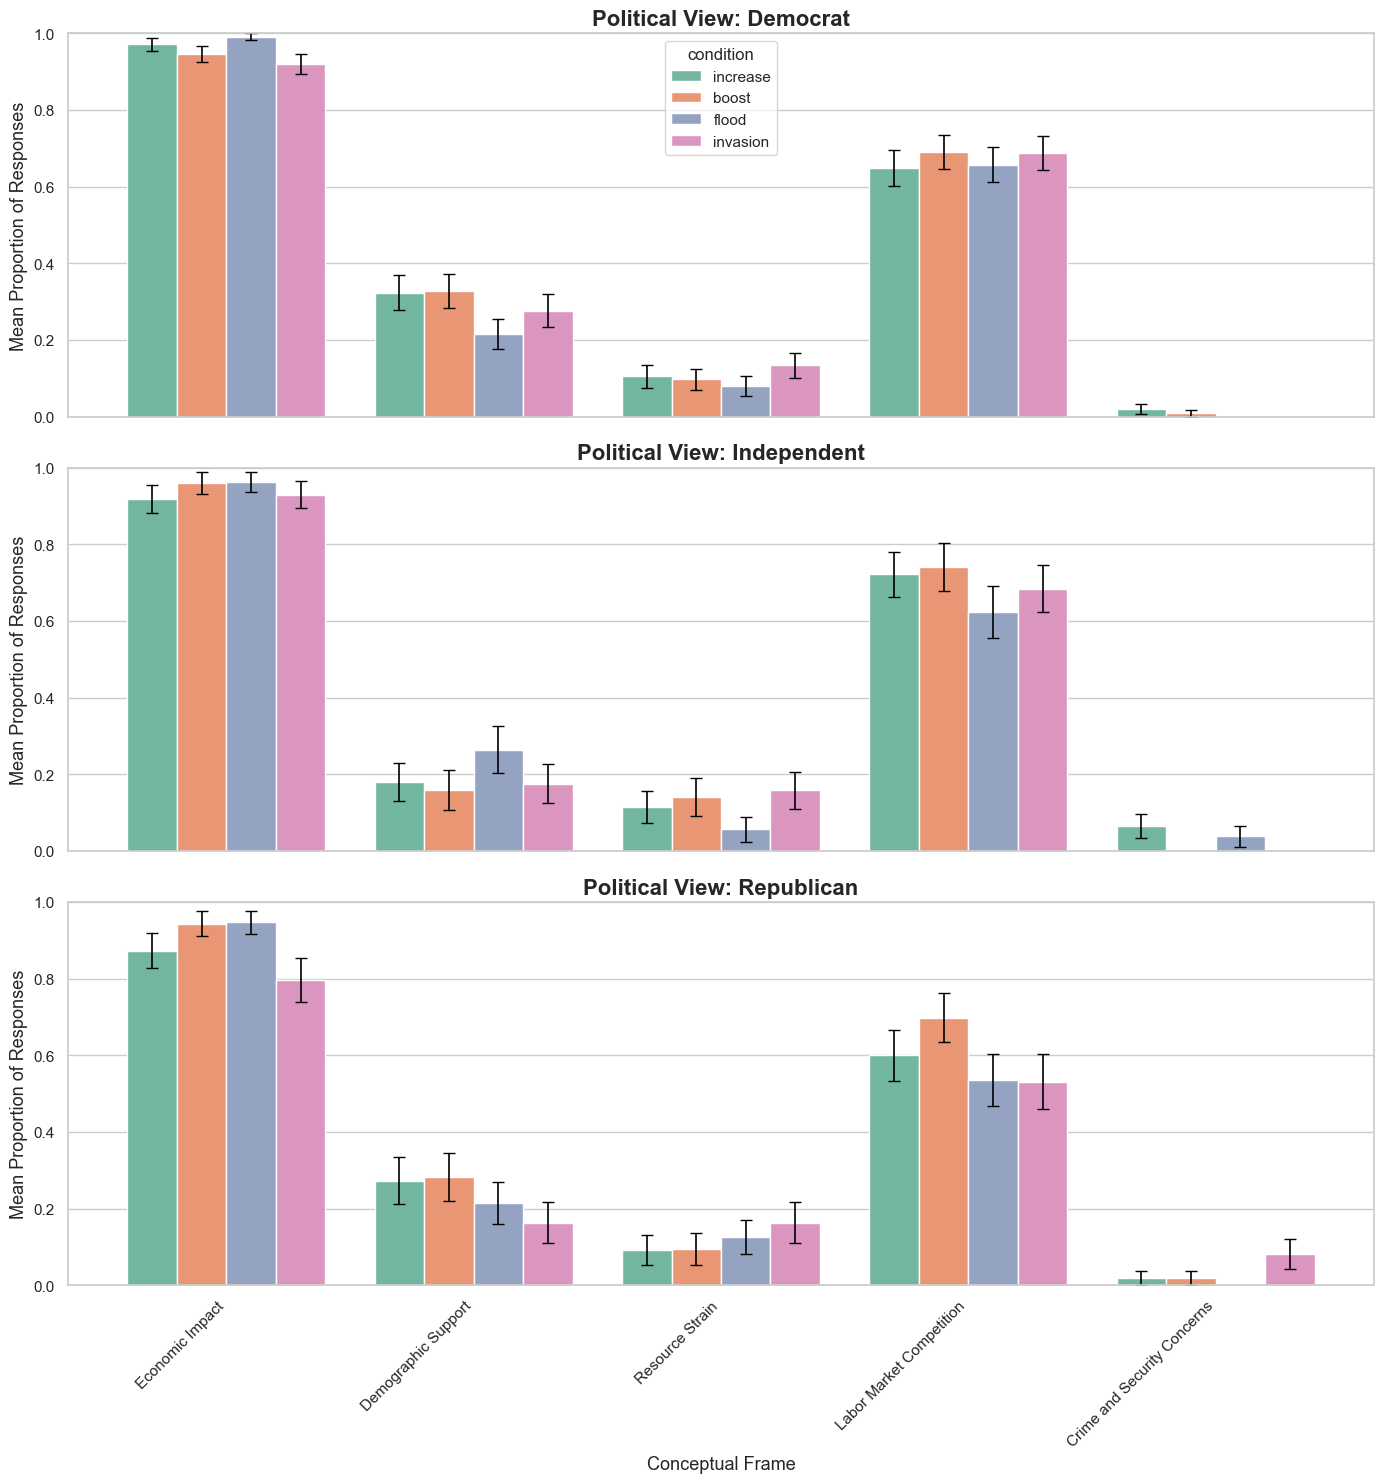

<Figure size 640x480 with 0 Axes>

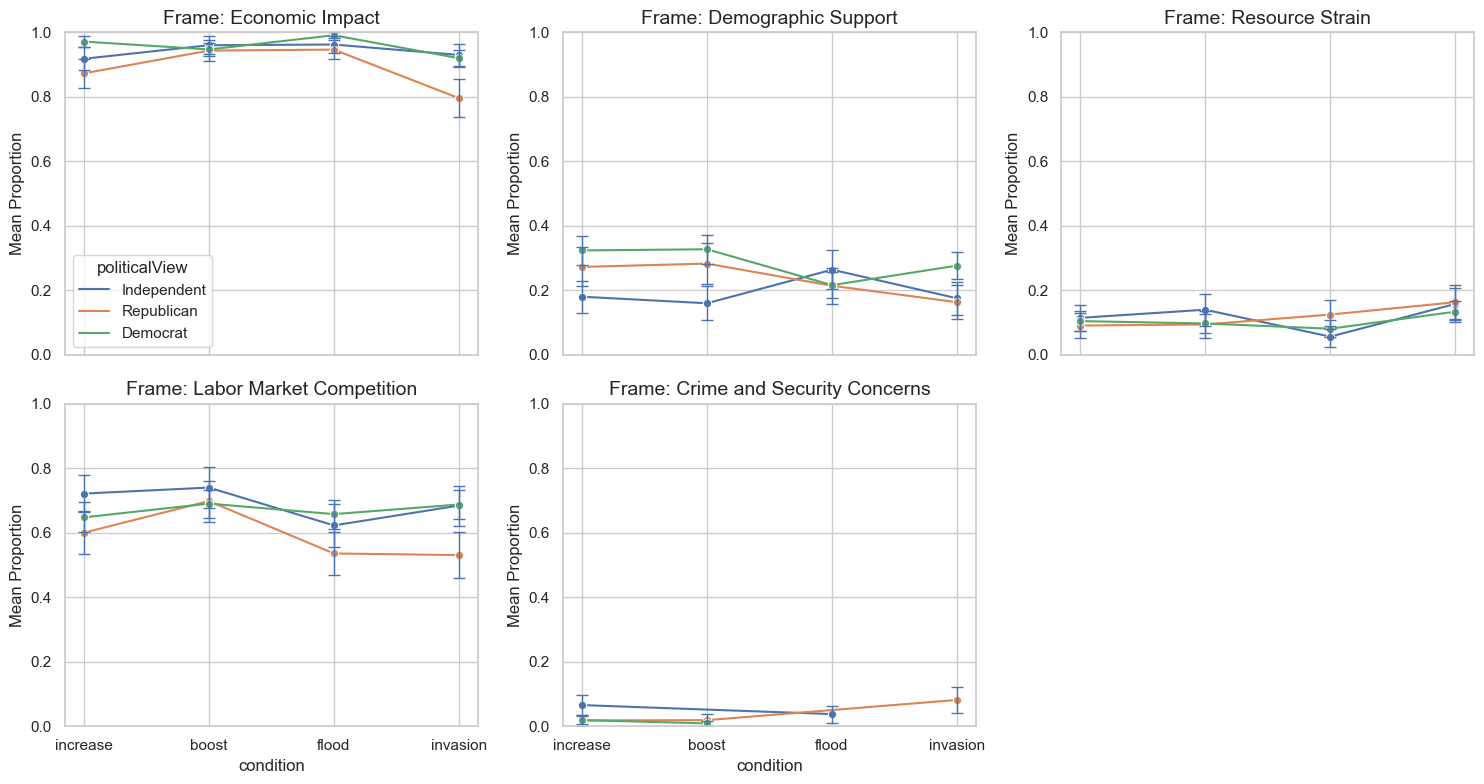

In [381]:
# Define your frame labels
frame_labels = [
    "Economic Impact", 
    "Demographic Support",
    "Resource Strain", 
    "Labor Market Competition", 
    "Crime and Security Concerns"
]

# Create both visualizations
fig1 = create_frame_facet_plot(df, frame_labels)
plt.savefig("frames_by_political_view.png", dpi=300, bbox_inches="tight")

plt.figure()
fig2 = create_frame_condition_grid(df, frame_labels)
plt.savefig("frames_by_condition_grid.png", dpi=300, bbox_inches="tight")

plt.show()

In [380]:
df_with_frames

,ResponseId,LocationLatitude,LocationLongitude,condition,openQ,valence,metaphor,likert,covertness,attention,...,Economic Impact,Demographic Support,Resource Strain,Labor Market Competition,Crime and Security Concerns,Economic Impact_confidence,Demographic Support_confidence,Resource Strain_confidence,Labor Market Competition_confidence,Crime and Security Concerns_confidence
0,R_3lVJS9mk7o2Togh,35.483795,-80.603104,flood,Immigration has helped Addison economically. ...,positive,NaN,10,False,increase,...,1.0,0.0,0.0,0.0,0.0,0.752174,0.391370,0.137202,0.202179,0.113263
10,R_u4vXBZWJx0MujXb,38.802902,-77.211601,flood,all of the low skill manual labor jobs have be...,negative,fill (container),3,False,increase,...,0.0,0.0,0.0,1.0,0.0,0.379236,0.254635,0.362943,0.545115,0.350661
11,R_3NFnPVLfLTttU2f,33.698807,-78.916000,invasion,Alot of cheap labor is available. Probably mo...,negative,drain,1,False,increase,...,0.0,0.0,1.0,0.0,0.0,0.245328,0.157166,0.488347,0.397919,0.246938
12,R_5i1uPLRQdNyZqUx,35.229599,-80.843002,invasion,Cheap labor has come in. It has taken away loc...,negative,NaN,2,False,Increase,...,0.0,0.0,0.0,1.0,0.0,0.343776,0.119553,0.273771,0.711070,0.234976
13,R_rpyVWpkMjI2yTSN,41.848297,-87.651703,flood,Flood has led to the change of economy. If the...,negative,NaN,4,False,cant remember,...,1.0,0.0,0.0,0.0,0.0,0.508956,0.087742,0.160070,0.188253,0.138271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,R_30eMMr8JHfxJD7r,33.787292,-117.923096,boost,"In my opinion, the change has been good. Not o...",positive,NaN,10,True,boost,...,1.0,1.0,0.0,0.0,0.0,0.611054,0.486401,0.190786,0.198300,0.156679
920,R_ByNdWJqFwbm8mMV,41.991592,-72.559998,invasion,The people that are native to the area probabl...,negative,NaN,5,True,invasion,...,0.0,0.0,0.0,1.0,0.0,0.330671,0.182282,0.342685,0.585165,0.302124
921,R_1loR2QJyFuQd9NU,27.959000,-82.493797,invasion,This will be a significant boost for the econo...,positive,boost,10,True,invasion,...,1.0,0.0,0.0,0.0,0.0,0.662572,0.345637,0.092040,0.110637,0.079768
922,R_2sZ0sBj2wvgYNrR,42.293106,-83.254799,flood,It appears that the immigrants have made count...,positive,NaN,8,False,Growth,...,1.0,0.0,0.0,0.0,0.0,0.985474,0.559514,0.188432,0.203123,0.170028


In [382]:
# Remove duplicated columns in case any frame columns were duplicated
df_clean = df_with_frames.loc[:, ~df_with_frames.columns.duplicated()].copy()
# For a single example (change the index as needed)
i = 10  # any row index
print("OpenQ:", df_clean.loc[i, "openQ"])
# # Display confidence scores if available
# print("\nFrame confidence scores:")
# for frame in frame_labels:
#     confidence_col = f"{frame}_confidence"
#     if confidence_col in df_with_frames.columns:
#         confidence = df_with_frames.loc[i, confidence_col]
#         print(f"  {frame}: {confidence:.3f}")
#     else:
#         print(f"  {frame}: N/A")
# Display detected frames
print("\nFrames detected:")
frames_detected = False
for frame in frame_labels:
    if frame in df_clean.columns and df_clean.loc[i, frame] == 1:
        print(f"✅ {frame}")
        frames_detected = True
if not frames_detected:
    print("No frames detected for this example.")
# If you have zero_shot_results available, you can still display those
if 'zero_shot_results' in globals():
    print("\nZero-shot classification results:")
    result = zero_shot_results[i]
    for j, (label, score) in enumerate(zip(result["labels"][:3], result["scores"][:3])):
        print(f"  {label}: {score:.3f}")

OpenQ: all of the low skill manual labor jobs have been filled by immigrants. it has probably put more local natives out of work

Frames detected:
✅ Economic Impact

Zero-shot classification results:
  Economic Impact: 0.356
  Demographic Support: 0.278
  Labor Market Competition: 0.186
